In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sweetviz as sv
import warnings

In [3]:
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment('my_experiment')

2023/05/11 15:43:45 INFO mlflow.tracking.fluent: Experiment with name 'my_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location=('file:///c:/Users/GeorgakisP/OneDrive - Titan Cement Company '
 'SA/Documents/Projects/Kamari Project '
 'Plan/QSP/mlflow/artifacts/680110746247929856'), creation_time=1683809025299, experiment_id='680110746247929856', last_update_time=1683809025299, lifecycle_stage='active', name='my_experiment', tags={}>

In [ ]:
mlflow.sklearn.autolog()

# Data

In [47]:
path = r"C:\Users\p.georgakis\OneDrive - Titan Cement Company SA\Documents\Projects\QSP\data\homogenized_historical_data_cleaned_v0.xlsx"

In [48]:
data = pd.read_excel(path)
data

,Unnamed: 0,Product Type,Source,325 Mesh Pass,Blaine,Limestone,LOI @ 950°C,LOI @ 550°C,FCaO (Wet),SiO2,...,Passing 88 µm,Passing 100 µm,Passing 170 µm,Passing 200 µm,Passing 325 µm,Passing 400 µm,1 Day,3 Day,7 Day,28 Day
0,0,2,0,98.20,5450,13.19,6.26,1.44,1.23,19.37,...,0.0,0.0,0.0,0,0,0,2120,3970,5120,6960
1,1,2,0,97.76,5190,13.16,6.11,1.30,1.09,19.30,...,0.0,0.0,0.0,0,0,0,1980,3900,5150,6800
2,2,2,0,97.96,5140,12.53,5.85,1.27,0.81,19.74,...,0.0,0.0,0.0,0,0,0,1950,3830,5050,6760
3,3,2,2,98.96,5350,14.31,6.20,0.97,0.95,19.50,...,0.0,0.0,0.0,0,0,0,2140,4190,5320,7220
4,4,2,0,97.66,5230,10.78,4.70,0.76,0.81,19.94,...,0.0,0.0,0.0,0,0,0,2290,4080,5600,7410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,2,1,97.68,5450,13.85,6.10,0.90,1.12,19.30,...,100.0,100.0,100.0,0,0,0,2310,4290,5650,6850
602,602,2,0,97.93,5440,14.30,6.46,1.09,1.04,19.17,...,100.0,100.0,100.0,0,0,0,2170,4330,5460,6850
603,603,2,2,98.30,5460,14.01,6.30,1.04,1.26,19.16,...,100.0,100.0,100.0,0,0,0,2440,4570,5720,7090
604,604,2,0,98.59,5280,14.25,6.42,1.07,1.09,19.44,...,100.0,100.0,100.0,0,0,0,2230,4320,5650,7109


In [ ]:
Source = {FM3: 0, FM4: 1, FM6: 2}
Product Type = {'GU': 0, 'I/II': 1, 'IL': 2, 'Masonry': 3, 'Stucco': 4}

In [7]:
alchemy_importances = [
    ('Alite Sum', 184.00),
    ('K2O', 74.54),
    ('325 Mesh Pass', 55.96),
    ('Alite M1', 53.37),
    ('HemiHydrate', 53.17),
    ('Belite Beta', 32.84),
    ('MgO', -24.75),
    ('SO3', 23.65),
    ('Arcanite', 22.32),
    ('Al2O3', 21.67),
    ('Calcite', 18.33),
    ('D50', -16.32),
    ('Blaine', -12.33),
    ('Belite Sum', -10.80),
    ('CaO', 6.82),
    ('D90', 1.87),
    ('Gypsum', 1.59),
    ('Na2O', 1.51),
    ('D1', 0.01),
    ('Aphthitalite', 0.01),
    ('Belite Alpha', 0.01),
    ('Belite Gamma', 0.01),
    ('Alum Cubic', 0.01),
    ('Alum Ortho', 0.01),
    ('Alum Sum', 0.01),
    ('Alite M3', 0.01),
    ('Ferrite', 0.01),
    ('Langbeinite', 0.01),
    ('Lime', 0.01),
    ('Periclase', 0.01),
    ('Portlandite', 0.01),
    ('Fraction M1', 0.01),
    ('Fe2O3', 0.01),
    ('SiO2', 0.01)
    ]

In [6]:
features_alchemy = [
            'Belite Sum',
            'Alite Sum',
            'Quartz',
            'Gypsum',
            'MgO',
            '325 Mesh Pass',
            'D50',
            'HemiHydrate',
            'CaO',
            'D90',
            'Fe2O3',
            'SO3',
            'Alite M1',
            'Al2O3',
            'Arcanite',
            'Blaine',
            'K2O',
            'Na2O',
            'Belite Beta',
            'D10',
            'Aphthitalite',
            'Belite Alpha',
            'Belite Gamma',
            'Alum Cubic',
            'Alum Ortho',
            'Alum Sum',
            'Alite M3',
            'Ferrite',
            'Calcite',
            'Langbeinite',
            'Lime',
            'Periclase',
            'Portlandite',
            'Fraction M1',
            'SiO2',
            'CO2']

In [14]:
features = ['Source', 'Product Type', 'CO2', 'Belite Sum', 'Alite Sum', 'Quartz', 'Gypsum', 'MgO', '325 Mesh Pass', 'D50', 'HemiHydrate', 'CaO', 'D90', 'Fe2O3', 'SO3', 'Alite M1', 'Al2O3', 'Arcanite', 'Blaine', 'K2O', 'Na2O', 'Belite Beta', 'D10', 'Aphthitalite', 'Belite Alpha', 'Belite Gamma', 'Alum Cubic', 'Alum Ortho', 'Alum Sum', 'Alite M3', 'Ferrite', 'Calcite', 'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Fraction M1', 'SiO2']

In [16]:
data[features]

,Belite Sum,Alite Sum,Quartz,Gypsum,MgO,325 Mesh Pass,D50,HemiHydrate,CaO,D90,...,Alum Sum,Alite M3,Ferrite,Calcite,Langbeinite,Lime,Periclase,Portlandite,Fraction M1,SiO2
0,15.30,49.60,2.24,1.06,0.81,98.20,0.00,2.55,63.62,0.00,...,5.18,14.73,8.96,13.11,0.04,0.65,0.23,0.25,70.29,19.37
1,14.65,48.97,2.11,2.40,0.82,97.76,0.00,1.47,63.84,0.00,...,5.79,14.80,8.76,13.82,0.00,0.49,0.19,0.38,69.77,19.30
2,17.73,48.57,1.83,2.28,0.80,97.96,0.00,1.56,63.91,0.00,...,5.32,14.47,9.98,10.74,0.00,0.53,0.19,0.56,70.22,19.74
3,15.39,49.45,1.80,2.39,0.81,98.96,0.00,1.41,64.00,0.00,...,5.60,14.96,9.66,12.60,0.04,0.46,0.17,0.66,69.74,19.50
4,17.11,51.62,0.97,1.12,0.82,97.66,0.00,2.17,64.51,0.00,...,5.04,15.04,10.18,10.05,0.04,0.59,0.21,0.36,70.87,19.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,11.24,52.89,1.62,2.38,0.85,97.68,13.98,1.18,64.26,36.18,...,5.57,17.45,9.87,12.60,0.08,0.44,0.21,0.93,67.00,19.30
602,11.34,49.82,2.37,2.32,0.84,97.93,14.40,1.22,64.06,36.52,...,5.15,17.17,9.24,15.50,0.05,0.65,0.23,0.70,65.53,19.17
603,10.64,52.69,2.10,2.26,0.85,98.30,13.20,1.06,64.27,33.49,...,5.03,17.65,9.86,13.80,0.07,0.72,0.24,0.83,66.50,19.16
604,13.83,50.70,1.98,2.28,0.84,98.59,14.08,1.30,64.04,35.46,...,4.63,17.07,9.72,13.50,0.09,0.69,0.16,0.67,66.33,19.44


In [ ]:
[print(c) for c in data.columns]

In [ ]:
data['Product Type'].unique()

In [9]:
grouped = data.groupby(['Product Type', 'Source']).agg({'Product Type': 'size',
                                                       '325 Mesh Pass': 'mean',
                                                       'Blaine': 'mean',
                                                       '1 Day': 'mean',
                                                       '3 Day': 'mean',
                                                       '7 Day': 'mean',
                                                       '28 Day': 'mean'
                                                       })
grouped.rename(columns={'Product Type': 'Size'}, inplace=True)
grouped = grouped.round(2)
grouped

Size  325 Mesh Pass   Blaine    1 Day    3 Day    7 Day  \
Product Type Source                                                            
0            2         18          98.59  5593.33  1906.67  3722.78  4740.56   
1            0          7          97.63  3985.71  2311.43  4137.14  5442.86   
             1          4          98.22  3882.50  2522.50  4532.50  5967.50   
             2          4          98.40  3837.50  2250.00  4122.50  5435.00   
2            0        227          98.26  5344.27  2233.48  4139.38  5418.46   
             1        230          98.15  5334.74  2240.17  4177.91  5472.96   
             2        116          98.81  5276.12  2292.50  4247.33  5579.14   

                      28 Day  
Product Type Source           
0            2       6008.89  
1            0       7265.71  
             1       7715.00  
             2       7295.00  
2            0       6938.72  
             1       7010.48  
             2       7116.90

In [6]:
y_columns = ['1 Day',
             '7 Day',
             '28 Day']

## Histograms

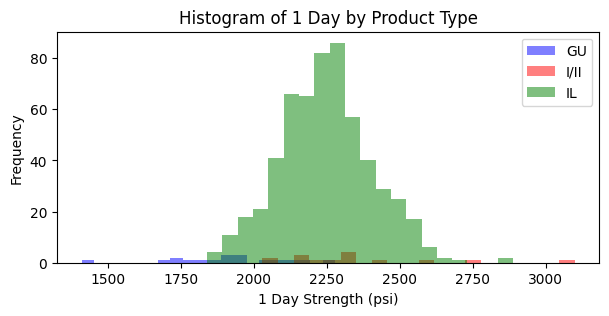

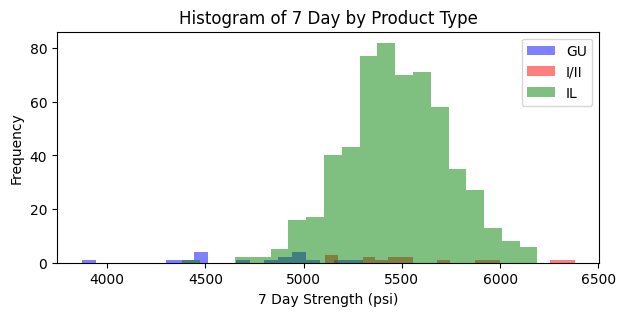

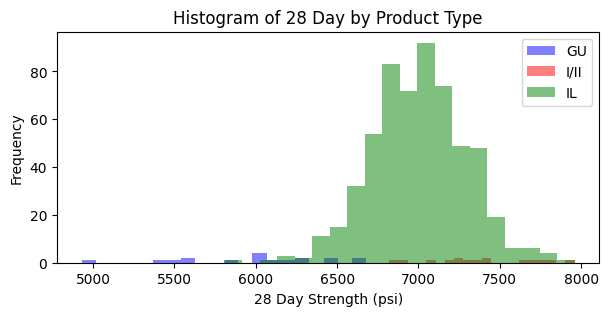

In [7]:
grouped = data.groupby('Product Type')
color_map = {0: 'blue', 
             1: 'red', 
             2: 'green',
             3: 'yellow', 
             4: 'purple'}

for feature in y_columns:
    fig, ax = plt.subplots(figsize=(7, 3))
    for product_type, tmp in grouped:
        plt.hist(tmp[feature], bins=20, alpha=0.5, color=color_map[product_type], label=product_type)

    # Set labels and title
    plt.xlabel(feature+' Strength (psi)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} by Product Type')

    # Add legend
    plt.legend(['GU', 'I/II', 'IL'])

    # Show the plot
    plt.show()

In [19]:
%matplotlib inline

In [15]:
import sweetviz as sv

c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
my_report = sv.analyze(data[features])
my_report.show_html(layout='widescreen') # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [21]:
from pandas_profiling import ProfileReport
design_report = ProfileReport(data[features])
design_report.to_file(output_file='report.html')

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_10136\173082858.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


In [13]:
data[features[2:]].hist(figsize=(20, 18))
plt.tight_layout()

In [61]:
df = pd.read_excel(r"C:\Users\p.georgakis\Downloads\Alcemy-April 23-Forecast-logbook.xlsx")
df

,Sample recorded at,Sample name,Cement name,Created at,Plant,Sample site,Notes,Strength 1 Day,Strength 1 Day Pred.,Strength 3 Day,...,Passing 50 Βµm,Passing 53 Βµm,Passing 63 Βµm,Passing 74 Βµm,Passing 88 Βµm,Passing 100 Βµm,Passing 170 Βµm,Passing 200 Βµm,Passing 325 Βµm,Passing 400 Βµm
0,"7/6/2023, 3:59:00 PM",FM230706-15,CEM IL,"7/6/2023, 4:40:21 PM",Titan Cement Pennsuco,FM4,FM 2023/07/06 09:00:00 IL FM230706-15 FM4,NaN,NaN,NaN,...,97.09,97.97,99.65,100.00,100.0,100.0,100.0,100.0,100.0,100.0
1,"7/6/2023, 1:59:00 PM",FM230706-12,CEM IL,"7/6/2023, 3:15:10 PM",Titan Cement Pennsuco,FM4,FM 2023/07/06 07:00:00 IL FM230706-12 FM4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"7/6/2023, 11:59:00 AM",FM230706-08,CEM IL,"7/6/2023, 1:00:09 PM",Titan Cement Pennsuco,FM4,FM 2023/07/06 05:00:00 IL FM230706-08 FM4,NaN,"2,152.307",NaN,...,97.42,98.25,99.77,100.00,100.0,100.0,100.0,100.0,100.0,100.0
3,"7/6/2023, 9:59:00 AM",FM230706-06,CEM IL,"7/6/2023, 10:55:22 AM",Titan Cement Pennsuco,FM4,FM 2023/07/06 03:00:00 IL FM230706-06 FM4,NaN,"1,988.503",NaN,...,95.56,96.62,98.95,99.89,100.0,100.0,100.0,100.0,100.0,100.0
4,"7/6/2023, 7:59:00 AM",FM230706-02,CEM IL,"7/6/2023, 9:15:10 AM",Titan Cement Pennsuco,FM4,FM 2023/07/06 01:00:00 IL FM230706-02 FM4,NaN,"1,952.774",NaN,...,97.53,98.34,99.79,100.00,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"4/1/2023, 11:59:00 AM",FM230401-08,CEM IL,"4/1/2023, 1:15:11 PM",Titan Cement Pennsuco,FM4,FM 2023/04/01 05:00:00 IL FM230401-08 FM4,NaN,"1,859.913",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048,"4/1/2023, 9:59:00 AM",FM230401-05,CEM IL,"4/1/2023, 10:55:13 AM",Titan Cement Pennsuco,FM4,FM 2023/04/01 03:00:00 IL FM230401-05 FM4,NaN,"1,752.399",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049,"4/1/2023, 7:59:00 AM",FM230401-02,CEM IL,"4/1/2023, 10:55:13 AM",Titan Cement Pennsuco,FM4,FM 2023/04/01 01:00:00 IL FM230401-02 FM4,NaN,"1,710.836",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,"4/1/2023, 5:59:00 AM",FM230331-34,CEM IL,"4/1/2023, 7:45:11 AM",Titan Cement Pennsuco,FM4,FM 2023/03/31 23:00:00 IL FM230331-34 FM4,NaN,"1,921.107",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_csv(r"C:\Users\p.georgakis\Downloads\alcemy-CEM IL-UTC-20230629-0702-Forecast-logbook.csv", sep=';')
df = df[::-1].reset_index()
df

In [62]:
df['Timestamp'] = pd.to_datetime(df['Sample recorded at'])
df = df.drop('Sample recorded at', axis=1)

In [ ]:
columns = ['Timestamp', 'Cement name', 'Created at', 'Plant', 'Sample site',
       'Notes', 'Strength 1 Day', 'Strength 1 Day Pred.', 'Strength 3 Day',
       'Strength 7 Day', 'Strength 7 Day Pred.', 'Strength 28 Day',
       'Strength 28 Day Pred.', '325 Mesh Pass', '325 Mesh Pass Target RAW',
       '325 Mesh Pass Target', '325 Mesh Pass Target unbounded', 'Blaine',
       'Air Cont.', 'CO2 Loss', 'LOI @ 950°C', 'LOI @ 550°C',
       'Limestone (Ignition Loss Computed)', 'FCaO (Wet)', 'Final Set Time',
       'Initial Set Time', 'FSP', 'Strength Cube Flow', 'Al2O3', 'CaO',
       'Fe2O3', 'K2O', 'MgO', 'Na2O', 'SiO2', 'SO3 (XRF)',
       'C2S (XRF Computed)', 'C3A (XRF Computed)', 'C3S (XRF Computed)',
       'C4AF (XRF Computed)', 'Albite', 'Andesine', 'Anhydrite', 'Anorthite',
       'Aphthitalite', 'Arcanite', 'HemiHydrate', 'Belite Alpha',
       'Belite AlphaH', 'Belite Beta', 'Belite Gamma', 'Belite Sum',
       'Alum Cubic', 'Alum Mono', 'Alum Ortho', 'Alum Sum', 'Alite M1',
       'Alite M3', 'Fraction M1', 'Alite Sum', 'Ferrite', 'Calcite',
       'Dolomite', 'Feldspar Sum', 'Gypsum', 'Illite', 'K-Feldspar',
       'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Quartz',
       'Syngenite', 'Thenardite', 'CO2', 'FCaO (XRD)', 'SO3 (XRD Computed)',
       'D10', 'D50', 'D90', 'Passing 1 µm', 'Passing 5 µm', 'Passing 10 µm',
       'Passing 12 µm', 'Passing 20 µm', 'Passing 25 µm', 'Passing 32 µm',
       'Passing 37 µm', 'Passing 44 µm', 'Passing 50 µm', 'Passing 53 µm',
       'Passing 63 µm', 'Passing 74 µm', 'Passing 88 µm', 'Passing 100 µm',
       'Passing 170 µm', 'Passing 200 µm', 'Passing 325 µm', 'Passing 400 µm']
df = df[columns]

In [ ]:
df.columns = ['Timestamp', 'Cement name', 'Created at', 'Plant', 'Sample site',
       'Notes', '1 Day', 'Strength 1 Day Pred.', 'Strength 3 Day',
       '7 Day', 'Strength 7 Day Pred.', '28 Day',
       'Strength 28 Day Pred.', '325 Mesh Pass', '325 Mesh Pass Target RAW',
       '325 Mesh Pass Target', '325 Mesh Pass Target unbounded', 'Blaine',
       'Air Cont.', 'CO2 Loss', 'LOI @ 950°C', 'LOI @ 550°C',
       'Limestone (Ignition Loss Computed)', 'FCaO (Wet)', 'Final Set Time',
       'Initial Set Time', 'FSP', 'Strength Cube Flow', 'Al2O3', 'CaO',
       'Fe2O3', 'K2O', 'MgO', 'Na2O', 'SiO2', 'SO3',
       'C2S (XRF Computed)', 'C3A (XRF Computed)', 'C3S (XRF Computed)',
       'C4AF (XRF Computed)', 'Albite', 'Andesine', 'Anhydrite', 'Anorthite',
       'Aphthitalite', 'Arcanite', 'HemiHydrate', 'Belite Alpha',
       'Belite AlphaH', 'Belite Beta', 'Belite Gamma', 'Belite Sum',
       'Alum Cubic', 'Alum Mono', 'Alum Ortho', 'Alum Sum', 'Alite M1',
       'Alite M3', 'Fraction M1', 'Alite Sum', 'Ferrite', 'Calcite',
       'Dolomite', 'Feldspar Sum', 'Gypsum', 'Illite', 'K-Feldspar',
       'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Quartz',
       'Syngenite', 'Thenardite', 'CO2', 'FCaO (XRD)', 'SO3 (XRD Computed)',
       'D10', 'D50', 'D90', 'Passing 1 µm', 'Passing 5 µm', 'Passing 10 µm',
       'Passing 12 µm', 'Passing 20 µm', 'Passing 25 µm', 'Passing 32 µm',
       'Passing 37 µm', 'Passing 44 µm', 'Passing 50 µm', 'Passing 53 µm',
       'Passing 63 µm', 'Passing 74 µm', 'Passing 88 µm', 'Passing 100 µm',
       'Passing 170 µm', 'Passing 200 µm', 'Passing 325 µm', 'Passing 400 µm']

In [ ]:
df1 = sv.compare(data[features], df)
df1.show_html('compare_april.html')

In [ ]:
df.dtypes[:30]

In [68]:
# v = 'Strength 1 Day Pred.'
# df[v] = df[v].str.replace(',','')
# df[v] = df[v].astype('float')

v = 'Strength 7 Day Pred.'
df[v] = df[v].str.replace(',','')
df[v] = df[v].astype('float')

v = 'Strength 28 Day Pred.'
df[v] = df[v].str.replace(',','')
df[v] = df[v].astype('float')

In [69]:
my_report = sv.analyze(df)
my_report.show_html('eda_april.html', layout='widescreen') # Default arguments will generate to "SWEETVIZ_REPORT.html"

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:49 -> (00:00 left)


Report eda_april.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
---
(likely due to only a single row containing non-NaN values for both correlated features)
Affected correlations:['Strength 28 Day/Albite', 'Strength 28 Day/Anhydrite', 'Strength 28 Day/K-Feldspar', 'Air Cont./K-Feldspar', 'Final Set Time/K-Feldspar', 'FSP/K-Feldspar', 'Albite/Strength 28 Day', 'Anhydrite/Strength 28 Day', 'K-Feldspar/Strength 28 Day', 'K-Feldspar/Air Cont.', 'K-Feldspar/Final Set Time', 'K-Feldspar/FSP']


In [13]:
def get_samples(df, source):
    con1 = df['Sample site']==source
    con2 = df['Strength 1 Day Pred.'].notna()
    con3 = df['Strength 7 Day Pred.'].notna()
    con4 = df['Strength 28 Day Pred.'].notna()
    con5 = df['Strength 1 Day'].notna()
    con6 = df['Strength 7 Day'].notna()
    con7 = df['Strength 28 Day'].notna()
    df[f'Hourly {source} Strength 1 Day'] = con1 & con2 & ~con5
    df[f'Hourly {source} Strength 7 Day'] = con1 & con3 & ~con5
    df[f'Hourly {source} Strength 28 Day'] = con1 & con4 & ~con5
    df[f'Homogenized {source} Strength 1 Day'] = con1 & con5
    df[f'Homogenized {source} Strength 7 Day'] = con1 & con6
    df[f'Homogenized {source} Strength 28 Day'] = con1 & con7
    return df

In [92]:
source = 'FM4'
dff =  get_samples(df, source)

In [99]:
dff[['Timestamp', f'Hourly {source} Strength 1 Day', 'Strength 1 Day Pred.']][df['Hourly FM4 Strength 1 Day']==True]

,Timestamp,Hourly FM4 Strength 1 Day,Strength 1 Day Pred.
2,2023-05-01 09:59:00,True,"1,997.694"
6,2023-05-01 11:59:00,True,"2,062.946"
8,2023-05-01 13:59:00,True,"2,017.507"
10,2023-05-01 15:59:00,True,"2,222.787"
13,2023-05-01 17:59:00,True,"2,166.58"
...,...,...,...
843,2023-05-30 13:59:00,True,"2,386.268"
846,2023-05-30 15:59:00,True,"2,486.633"
850,2023-05-30 17:59:00,True,"2,444.112"
853,2023-05-30 19:59:00,True,"2,380.09"


In [101]:
dff[['Timestamp', f'Homogenized {source} Strength 1 Day', 'Strength 1 Day']][df['Homogenized FM4 Strength 1 Day']==True]

,Timestamp,Homogenized FM4 Strength 1 Day,Strength 1 Day
4,2023-05-01 11:23:00,True,"2,340"
55,2023-05-03 11:41:00,True,"2,350"
94,2023-05-04 11:46:00,True,"2,360"
123,2023-05-05 11:51:00,True,"2,030"
152,2023-05-06 12:13:00,True,"1,950"
181,2023-05-07 12:29:00,True,"2,280"
215,2023-05-08 11:40:00,True,"2,340"
277,2023-05-10 12:08:00,True,"2,270"
303,2023-05-11 11:38:00,True,"2,400"
333,2023-05-12 12:03:00,True,"2,500"


# ML

## Functions

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

def train_test_split_data(X, y, test_size=0.2, random_state=42):
    """
    Split the data into training and testing sets.
    
    Args:
    - X: Features array
    - y: Target array
    - test_size: The proportion of the dataset to include in the test split (default: 0.2)
    - random_state: Random seed for reproducibility (default: 42)
    
    Returns:
    - X_train: Training features
    - X_test: Testing features
    - y_train: Training target
    - y_test: Testing target
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


def train_models(X_train, y_train, models):
    """
    Train multiple regression models using the provided training data.
    
    Args:
    - X_train: Training features
    - y_train: Training target
    - models: List of regression model objects
    
    Returns:
    - trained_models: Dictionary containing trained models
    """
    trained_models = {}
    for model in models:
        model.fit(X_train, y_train)
        trained_models[type(model).__name__] = model
    return trained_models

def evaluate_models(X_test, y_test, trained_models):
    """
    Evaluate the trained regression models using the provided testing data.
    
    Args:
    - X_test: Testing features
    - y_test: Testing target
    - trained_models: Dictionary containing trained models
    
    Returns:
    - model_scores: Dictionary containing model evaluation scores (e.g., RMSE)
    """
    model_scores = {}
    for model_name, model in trained_models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        model_scores[model_name] = rmse
    return model_scores

def optimize_hyperparameters(X_train, y_train, model, param_grid, cv=5):
    """
    Perform hyperparameter optimization for a given model using grid search cross-validation.
    
    Args:
    - X_train: Training features
    - y_train: Training target
    - model: Regression model object
    - param_grid: Dictionary with hyperparameter names as keys and lists of values to search as values
    - cv: Number of cross-validation folds (default: 5)
    
    Returns:
    - best_model: Optimized model with the best hyperparameters
    """
    grid_search = GridSearchCV(model, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

def plot_time_series(actual_values, predicted_values, title):
    """
    Plot time series data (e.g., for time-based predictions).
    
    Args:
    - actual_values: Array of actual target values
    - predicted_values: Array of predicted target values
    - title: Title for the plot
    """
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label='Actual')
    plt.plot(predicted_values, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_scatter(actual_values, predicted_values, title):
    """
    Plot scatter plot comparing actual vs predicted values.
    
    Args:
    - actual_values: Array of actual target values
    - predicted_values: Array of predicted target values
    - title: Title for the plot
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(actual_values, predicted_values)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.show()


## Stack models

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform

In [15]:
target = '28 Day'
features = ['CO2', 'Belite Sum', 'Alite Sum', 'Quartz', 'Gypsum', 'MgO', '325 Mesh Pass', 'D50', 'HemiHydrate', 'CaO', 'D90', 'Fe2O3', 'SO3', 'Alite M1', 'Al2O3', 'Arcanite', 'Blaine', 'K2O', 'Na2O', 'Belite Beta', 'D10', 'Aphthitalite', 'Belite Alpha', 'Belite Gamma', 'Alum Cubic', 'Alum Ortho', 'Alum Sum', 'Alite M3', 'Ferrite', 'Calcite', 'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Fraction M1', 'SiO2']

In [16]:
X = data[features]
y = data[target]

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
joblib.dump(random_search, './models/28_day_stack.sav')

['./models/28_day_stack.sav']

In [22]:
# Create the base models
base_models = [
    ('linear', LinearRegression()),
    ('forest', ExtraTreesRegressor())
]

# Define the parameter distributions for random search
param_distributions = {
    'stack__forest__n_estimators': randint(100, 300),
    'stack__forest__max_depth': [None, 10]
}

# Create the meta-model
meta_model = LinearRegression()

# Create the stack model with hyperparameter tuning
stack_model = Pipeline([
    ('stack', StackingRegressor(estimators=base_models, final_estimator=meta_model))
])

# Perform random search for hyperparameter tuning
random_search = RandomizedSearchCV(stack_model, param_distributions=param_distributions, cv=5, n_iter=10)
random_search.fit(X_train, y_train)

# Generate predictions from the stack model with the best hyperparameters
stack_preds = random_search.predict(X_test)

# Evaluate the stack model
mse = mean_squared_error(y_test, stack_preds)
print("Mean Squared Error:", mse)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Mean Squared Error: 48210.82587287874
Best Hyperparameters: {'stack__forest__max_depth': None, 'stack__forest__n_estimators': 134}


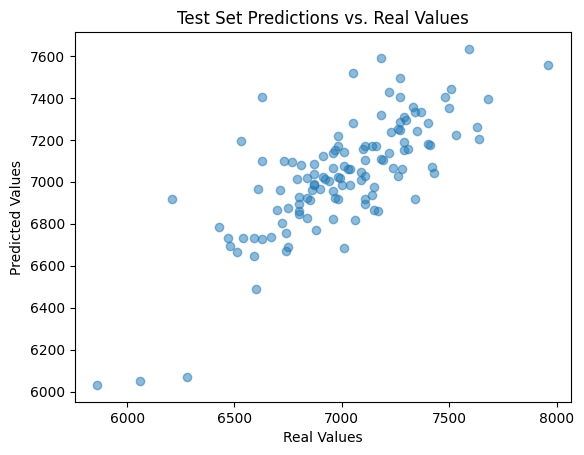

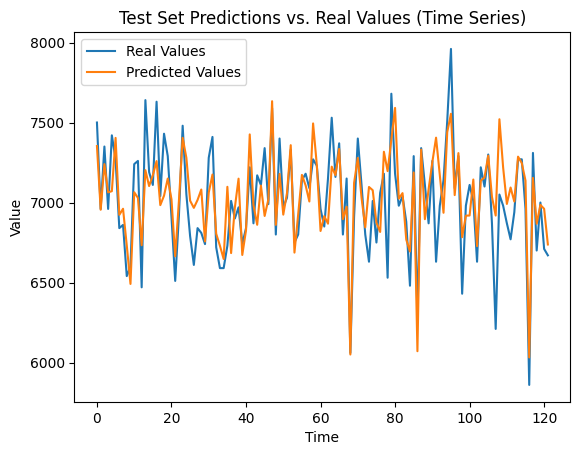

In [23]:

# Scatter plot of test set predictions vs. real values
plt.scatter(y_test, stack_preds, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Predictions vs. Real Values')
plt.show()

# Time series plot of test set predictions vs. real values
plt.plot(np.arange(len(y_test)), y_test, label='Real Values')
plt.plot(np.arange(len(y_test)), stack_preds, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Set Predictions vs. Real Values (Time Series)')
plt.legend()
plt.show()

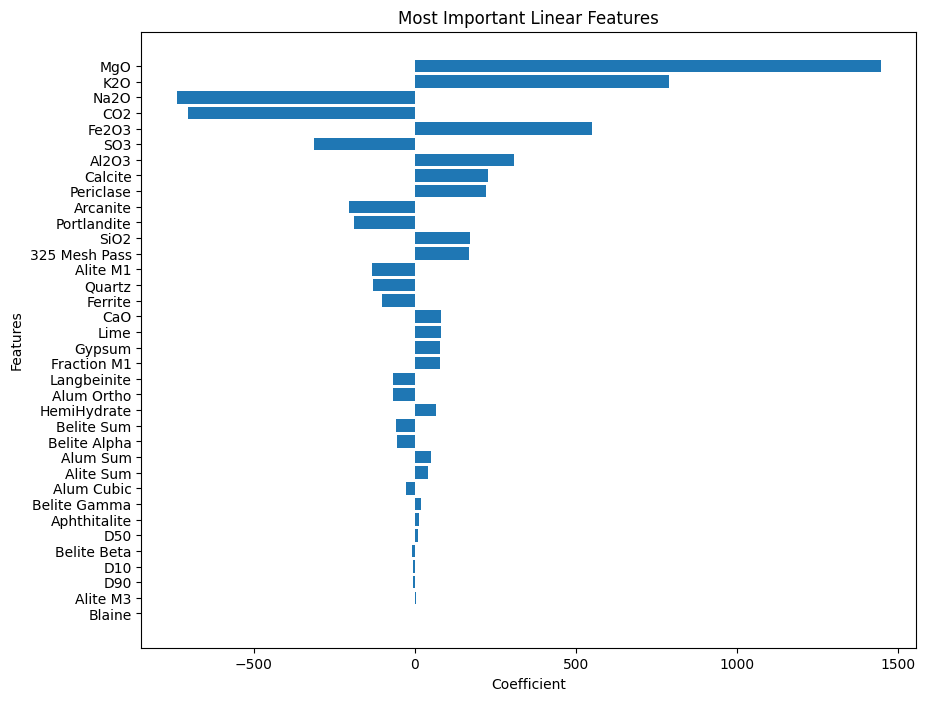

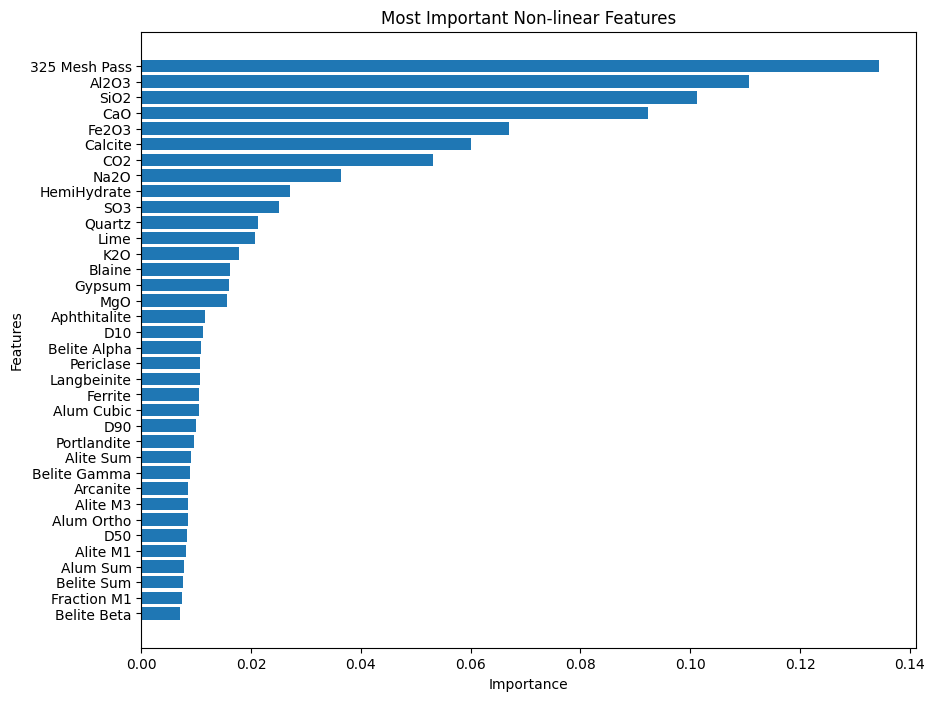

In [24]:
# feature_importance = random_search.best_estimator_['stack'].final_estimator_.coef_
feature_names = features

# Plot most important linear features
linear_coef = random_search.best_estimator_['stack'].named_estimators_['linear'].coef_
# Sort feature names and coefficients based on absolute coefficient values
sorted_linear_features = sorted(zip(feature_names, linear_coef), key=lambda x: abs(x[1]))
sorted_feature_names_linear = [feature for feature, _ in sorted_linear_features]
sorted_linear_coef = [coef for _, coef in sorted_linear_features]
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names_linear, sorted_linear_coef)
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Most Important Linear Features')
plt.show()

forest_importance = random_search.best_estimator_['stack'].named_estimators_['forest'].feature_importances_
# Sort feature names and importances based on importance values
sorted_forest_features = sorted(zip(feature_names, forest_importance), key=lambda x: x[1])
sorted_feature_names_forest = [feature for feature, _ in sorted_forest_features]
sorted_forest_importance = [importance for _, importance in sorted_forest_features]

plt.figure(figsize=(10, 8))
# Plot sorted non-linear features
plt.barh(sorted_feature_names_forest, sorted_forest_importance)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Most Important Non-linear Features')
plt.show()

In [ ]:
df[target] = df[target].str.replace(',','.')
df[target] = df[target].astype('float')
df[target] = df[target]*1000

In [137]:
# df['Strength 28 Day Pred.'].str.replace(',','.')
df['Strength 28 Day Pred.'] = df['Strength 28 Day Pred.'].str.replace(',','')
df['Strength 28 Day Pred.'] = df['Strength 28 Day Pred.'].astype(float)

In [144]:
dff = df[features+[target]+['Strength 28 Day Pred.']].dropna()

In [145]:
X = dff[features]
y = dff[target]

In [146]:
X['Blaine'] = X['Blaine'].str.replace(',','.')
X['Blaine'] = X['Blaine'].astype('float')

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_23352\1643301208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Blaine'] = X['Blaine'].str.replace(',','.')
C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_23352\1643301208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Blaine'] = X['Blaine'].astype('float')


Mean Squared Error: 731008.289967793
Best Hyperparameters: {'stack__forest__max_depth': 10, 'stack__forest__n_estimators': 236, 'stack__linear__fit_intercept': True}


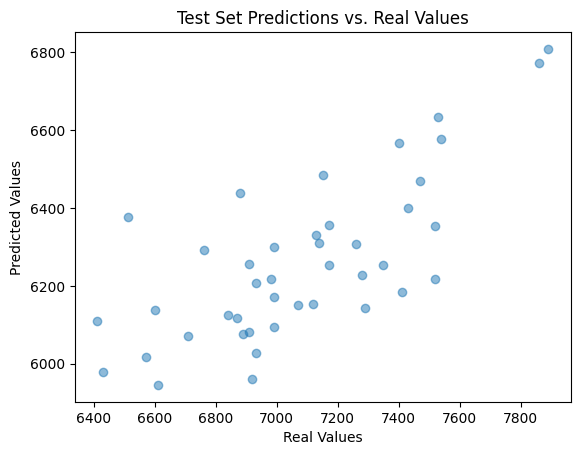

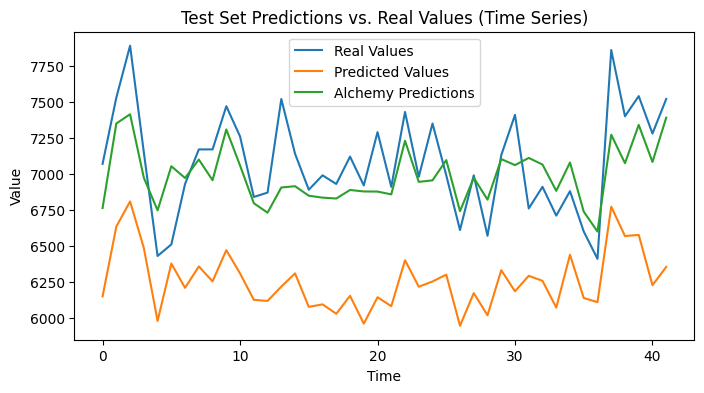

In [151]:
stack_preds = random_search.predict(X)

# Evaluate the stack model
mse = mean_squared_error(y, stack_preds)
print("Mean Squared Error:", mse)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Scatter plot of test set predictions vs. real values
plt.scatter(y, stack_preds, alpha=0.5)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Test Set Predictions vs. Real Values')
plt.show()

plt.figure(figsize=(8, 4))
# Time series plot of test set predictions vs. real values
plt.plot(np.arange(len(y)), y, label='Real Values')
plt.plot(np.arange(len(y)), stack_preds, label='Predicted Values')
plt.plot(np.arange(len(y)), dff['Strength 28 Day Pred.'], label='Alchemy Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Test Set Predictions vs. Real Values (Time Series)')
plt.legend()
plt.show()

## Feature Importance

In [152]:
model = joblib.load(r"C:\Users\p.georgakis\OneDrive - Titan Cement Company SA\Documents\Projects\QSP\models\Alcemy_ExtraTress_v2.1.cls")

c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


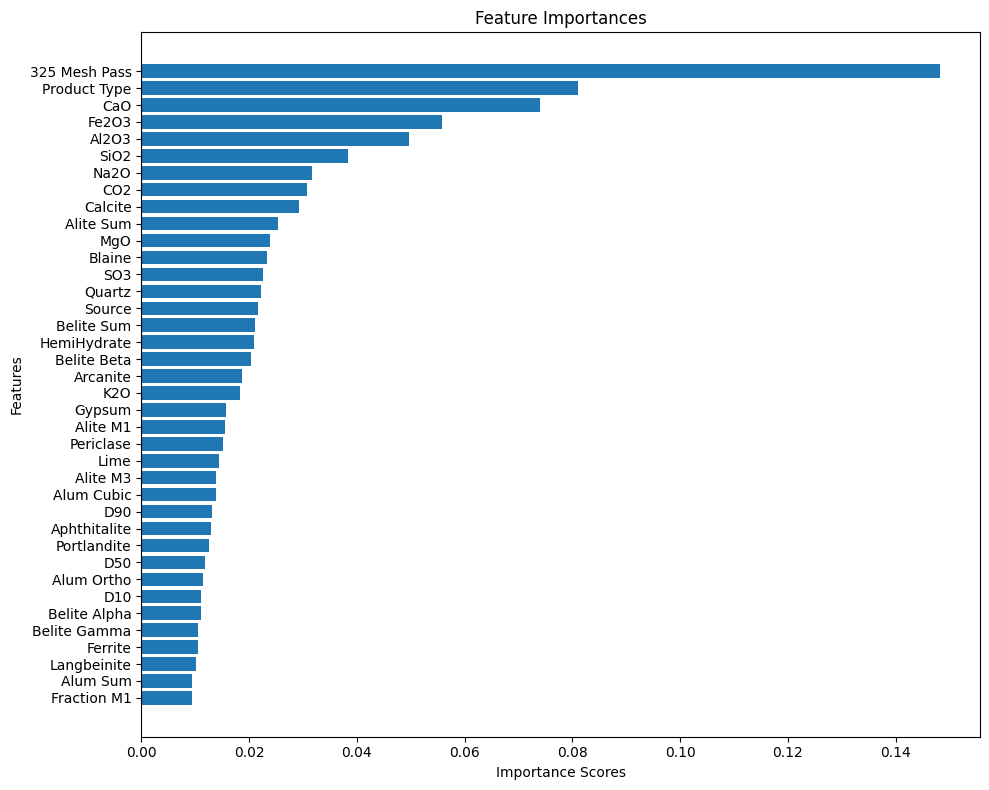

In [ ]:
importances = model.feature_importances_
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_labels = [features[i] for i in sorted_indices]

# Plot the feature importances as a horizontal bar plot with descending order
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), sorted_importances, align='center')
plt.yticks(range(len(importances)), sorted_feature_labels)
plt.ylabel('Features')
plt.xlabel('Importance Scores')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [18]:
al_features = []
al_importances = []
for f, i in alchemy_importances:
    al_features.append(f)
    al_importances.append(abs(i))

al_importances = np.array(al_importances)
al_features = np.array(al_features)

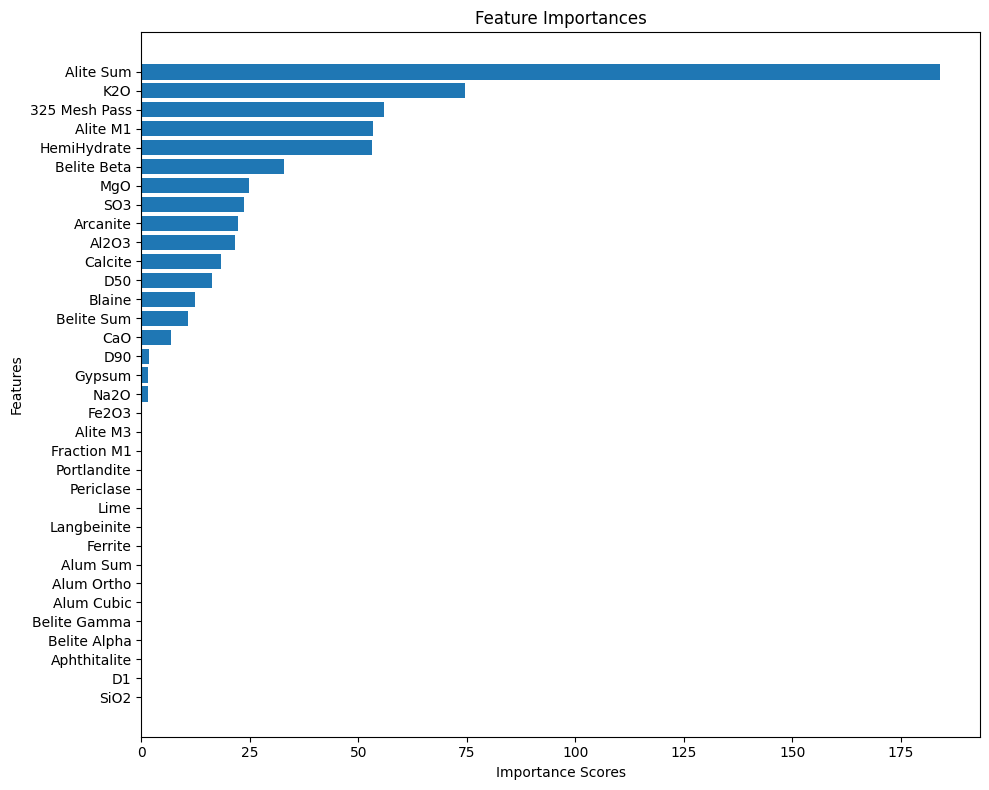

In [19]:
sorted_indices = al_importances.argsort()
sorted_importances = al_importances[sorted_indices]
sorted_feature_labels = [al_features[i] for i in sorted_indices]

plt.figure(figsize=(10, 8))
plt.barh(range(len(al_importances)), sorted_importances, align='center')
plt.yticks(range(len(al_importances)), sorted_feature_labels)
plt.ylabel('Features')
plt.xlabel('Importance Scores')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [77]:
print(features_alchemy)

['Product Type', 'Source', 'Belite Sum', 'Alite Sum', 'Quartz', 'Gypsum', 'MgO', '325 Mesh Pass', 'D50', 'HemiHydrate', 'CaO', 'D90', 'Fe2O3', 'SO3', 'Alite M1', 'Al2O3', 'Arcanite', 'Blaine', 'K2O', 'Na2O', 'Belite Beta', 'D10', 'Aphthitalite', 'Belite Alpha', 'Belite Gamma', 'Alum Cubic', 'Alum Ortho', 'Alum Sum', 'Alite M3', 'Ferrite', 'Calcite', 'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Fraction M1', 'SiO2', 'CO2']


In [17]:
features

['xrdBeliteAlpha',
 'xrdAliteSum',
 'xrdBeliteSum',
 'SiO2',
 'xrdLangbeinite',
 'xrdfCaO',
 'xrdHemiHydrate',
 'Blaine',
 'Mesh325PassPct',
 'PsdX50',
 'SO3',
 'xrdAliteM1',
 'K2O',
 'xrdArcanite',
 'MgO',
 'xrdQuartz',
 'PsdX90',
 'Al2O3',
 'xrdBeliteBeta',
 'Strength1_PSI',
 'Strength3_PSIStrength7_PSI',
 'Strength28_PSI']

In [41]:
features.extend(['Strength1_PSI',
                 'Strength3_PSI',
                 'Strength7_PSI',
                 'Strength28_PSI'])

In [36]:
encoded_data = pd.get_dummies(data[['ProductType', 'Source']])
encoded_data

,ProductType_GU,ProductType_I/II,ProductType_IL,ProductType_Masonry,ProductType_Stucco,Source_FM3,Source_FM4,Source_FM6
0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
779,0,0,1,0,0,1,0,0
780,0,0,1,0,0,0,1,0
781,0,0,0,0,1,0,0,1
782,0,0,1,0,0,0,0,1


In [20]:
grouped = data.groupby(['ProductType', 'Source']).agg({'ProductType': 'size',
                                                       'Mesh325PassPct': 'mean',
                                                       'Blaine': 'mean',
                                                       'Strength1_PSI': ['mean', lambda x: x.isna().sum()],
                                                       'Strength3_PSI': 'mean',
                                                       'Strength7_PSI': 'mean',
                                                       'Strength28_PSI': 'mean'
                                                       })
grouped.rename(columns={'ProductType': 'Size'}, inplace=True)
grouped = grouped.round(2)
grouped

Size Mesh325PassPct   Blaine Strength1_PSI             \
                   size           mean     mean          mean <lambda_0>   
ProductType Source                                                         
GU          FM6      25          98.60  5671.20       1910.00          1   
I/II        FM3       7          97.63  3985.71       2311.43          0   
            FM4       4          98.22  3882.50       2522.50          0   
            FM6       4          98.40  3837.50       2250.00          0   
IL          FM3     252          98.26  5346.75       2227.38          0   
            FM4     256          98.13  5336.68       2234.80          0   
            FM6     128          98.79  5289.22       2287.22          2   
Masonry     FM6      32          97.51  7206.56           NaN         32   
Stucco      FM3       1          95.25  8010.00           NaN          1   
            FM6      75          97.71  7211.20           NaN         75   

                   Strength3_PSI Strength7_PSI Strength28_PSI  
                            mean          mean           mean  
ProductType Source                                             
GU          FM6          3706.25       4517.92        6008.89  
I/II        FM3          4137.14       5442.86        7265.71  
            FM4          4532.50       5967.50        7715.00  
            FM6          4122.50       5435.00        7295.00  
IL          FM3          4104.22       5424.21        6912.05  
            FM4          4177.87       5459.44        7014.14  
            FM6          4227.80       5572.80        7116.02  
Masonry     FM6          2110.97       2672.90        3374.29  
Stucco      FM3          1810.00       2330.00        3020.00  
            FM6          1908.78       2423.97        3096.06

In [30]:
grouped = data.groupby(['ProductType', 'Source']).agg({
    'ProductType': 'size',
    **{column: ['mean', lambda x: x.isna().sum()] for column in features}
})

grouped.rename(columns={'ProductType': 'Size'}, inplace=True)
grouped = grouped.round(2)
grouped

Size xrdBeliteAlpha            xrdAliteSum             \
                   size           mean <lambda_0>        mean <lambda_0>   
ProductType Source                                                         
GU          FM6      25           0.82          0       43.64          0   
I/II        FM3       7           0.38          1       56.23          1   
            FM4       4           0.42          0       55.74          0   
            FM6       4           0.59          0       55.06          0   
IL          FM3     252           0.58         17       49.48         17   
            FM4     256           0.57         17       50.00         17   
            FM6     128           0.55         11       49.62         11   
Masonry     FM6      32           0.83          0       35.24          0   
Stucco      FM3       1           0.88          0       34.53          0   
            FM6      75           0.83          3       35.10          3   

                   xrdBeliteSum              SiO2            xrdLangbeinite  \
                           mean <lambda_0>   mean <lambda_0>           mean   
ProductType Source                                                            
GU          FM6           12.46          0  18.16          0           0.05   
I/II        FM3           16.85          1  20.14          0           0.06   
            FM4           15.97          0  20.46          0           0.05   
            FM6           15.01          0  20.38          0           0.02   
IL          FM3           14.21         17  19.22          0           0.04   
            FM4           14.31         17  19.31          0           0.04   
            FM6           14.47         11  19.31          0           0.04   
Masonry     FM6           10.19          0  16.67          0           0.07   
Stucco      FM3            9.69          0  16.74          0           0.18   
            FM6           10.38          3  16.72          0           0.08   

                    ...   MgO            xrdQuartz            PsdX90  \
                    ...  mean <lambda_0>      mean <lambda_0>   mean   
ProductType Source  ...                                                
GU          FM6     ...  0.79          0      3.27          0  34.36   
I/II        FM3     ...  0.84          0      0.50          1    NaN   
            FM4     ...  0.85          0      0.84          0    NaN   
            FM6     ...  0.86          0      1.03          0  38.17   
IL          FM3     ...  0.82          0      2.02         17  35.79   
            FM4     ...  0.82          0      1.94         17  36.88   
            FM6     ...  0.82          0      1.96         11  34.94   
Masonry     FM6     ...  0.74          0      4.81          0  35.75   
Stucco      FM3     ...  0.75          0      6.08          0  45.72   
            FM6     ...  0.74          0      4.76          3  35.02   

                              Al2O3            xrdBeliteBeta             
                   <lambda_0>  mean <lambda_0>          mean <lambda_0>  
ProductType Source                                                       
GU          FM6             3  3.73          0         10.48          0  
I/II        FM3             7  4.70          0         12.89          1  
            FM4             4  4.83          0         12.22          0  
            FM6             2  4.78          0         12.90          0  
IL          FM3            78  4.24          0         11.54         17  
            FM4            82  4.26          0         11.68         17  
            FM6            41  4.24          0         11.81         11  
Masonry     FM6            11  3.13          0          8.46          0  
Stucco      FM3             0  3.14          0          8.12          0  
            FM6            22  3.14          0          8.53          3  

[10 rows x 39 columns]

In [ ]:
train_data = data

In [ ]:
# Example usage
X = data
y = # Your target array

X_train, X_test, y_train, y_test = train_test_split_data(X, y)

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor()
]

trained_models = train_models(X_train, y_train, models)

model_scores = evaluate_models(X_test, y_test, trained_models)
print("Model scores:")
for model_name, score in model_scores.items():
    print(f"{model_name}: {score}")

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100, 200]
}

best_model = optimize_hyperparameters(X_train, y_train, RandomForestRegressor(), param_grid)
print("Best model hyperparameters:")
print(best_model.get_params())

# Assuming you have actual and predicted values
actual_values = # Your array of actual target values
predicted_values = # Your array of predicted target values

plot_time_series(actual_values, predicted_values, "Time Series Plot")
plot_scatter(actual_values, predicted_values, "Scatter Plot")

# Simulator

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import itertools
import matplotlib as mpl


def create_simulator_config(block, output_variable):
    """Function that creates the configuration excel file of a desired variable
    and the saving directory of that excel file.

    Args:
        block: Data frame containing the variables.
        output_variable: Desired variable.

    Returns:
        Τhe configuration directory.
    """
    input_features = list(block.columns)
    df = pd.DataFrame(columns=['Value', 'Min', 'Max', 'Step', 'ID'], index=input_features)
    df.index.name = 'Input Features'
    df['Value'] = block[input_features].mean().values
    config_path = './predictions_simulator/simulator_config_{}.xlsx'.format(output_variable)
    df.to_excel(config_path)

    return config_path


def create_test_block(config_path):
    """Function that takes the configuration excel and creates a data
    frame(test_block).

    Args:
        config_path: Configuration directory.

    Returns:
        Test block: Data frame containing the variables.
        Manipulated variables: List of variables included in the df.

    """
    df = pd.read_excel(config_path, index_col=0)

    input_features = list(df.index)
    test_block = pd.DataFrame(columns=input_features)

    manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)
    ranges = []
    for var in manipulated_variables:
        ranges.append(np.arange(df.loc[var, 'Min'],
                                df.loc[var, 'Max'],
                                df.loc[var, 'Step']))
    test_block[manipulated_variables] = pd.DataFrame(list(itertools.product(*ranges)))

    constant_variables = list(set(input_features) - set(manipulated_variables))
    for var in constant_variables:
        test_block[var] = df.loc[var, 'Value']

    return test_block, manipulated_variables


def plot_simulated_predictions(test_block, manipulated_variables, output_variable, output_dir='./'):
    """Function that creates a plot of a manipulated variable against the
    predicted variable in order to check what effect has a change in the
    manipulated variable to the predicted variable.

    Args:
        test_block: Data frame containing the variables.
        manipulated_variables: List of variables included in the df.
        output_variable: Predicted variable.
        output_dir: Directory in which the plots will be saved.

    Returns:
        simulated prediction plot.
    """
    params = {'legend.fontsize': 'large',
              'axes.labelsize': 'large',
              'axes.titlesize': 'Large',
              'xtick.labelsize': 'large',
              'ytick.labelsize': 'large'}
    mpl.rcParams.update(params)

    unique_values = {}
    for var in manipulated_variables[1:]:
        unique_values.update({var: test_block[var].unique()})

    for value_2 in unique_values[manipulated_variables[2]]:
        fig, ax = plt.subplots(figsize=(20, 5))
        temp_2 = test_block[test_block[manipulated_variables[2]] == value_2]
        for value_1 in unique_values[manipulated_variables[1]]:
            temp_1 = temp_2[temp_2[manipulated_variables[1]] == value_1]
            ax.plot(temp_1[manipulated_variables[0]], temp_1[output_variable], marker='.',
                    label='%s=%0.2f' % (manipulated_variables[1], value_1))

        plt.grid()
        plt.ylabel(output_variable)
        plt.xlabel(manipulated_variables[0])
        plt.legend()
        plt.tight_layout()
        ax.set_title('{}={}'.format(manipulated_variables[2], value_2))
        plt.show()

        fig.savefig(output_dir + '/{}_{}_{}.png'.format(manipulated_variables[0], manipulated_variables[2], value_2))


def simulate_predictions(output_variable, model, config_path, root_dir, multioutput_feature_names=None):
    """
        Combination of the above functions in order to produce the simulated
        predictions plot.

    Args:
        output_variable: Predicted variable.
        model: Model utilised for the predictions.
        config_path: Directory in which the configuration excel is stored.
        root_dir:

    Returns:
        simulated prediction plot.
    """
    test_block, manipulated_variables = create_test_block(config_path=config_path)
    if multioutput_feature_names == None:
        test_block[output_variable] = model.predict(test_block)
    else:
        test_block[multioutput_feature_names] = model.predict(test_block)
        test_block.to_csv('./simulation.csv')
        
    now = datetime.datetime.now()
    current_date = output_variable + '_' + str(now.day) + str(now.month) + str(now.year)[-2:] + str(now.hour) + str(
        now.minute) + str(now.second)
    output_dir = root_dir + '/' + current_date
    os.makedirs(output_dir)

    plot_simulated_predictions(test_block, 
                               manipulated_variables=manipulated_variables, 
                               output_variable=output_variable,
                               output_dir=output_dir)


In [8]:
config_path = r"C:\Users\p.georgakis\OneDrive - Titan Cement Company SA\Documents\Projects\QSP\predictions_simulator\simulator_config_28 Day.xlsx"

In [127]:
sim_data = pd.read_csv(r"C:\Users\p.georgakis\OneDrive - Titan Cement Company SA\Documents\Projects\QSP\simulation.csv")

In [39]:
d = data[(data['Source']==1) & (data['Product Type']==2)][features]
config_path = create_simulator_config(d, '28 Day')

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


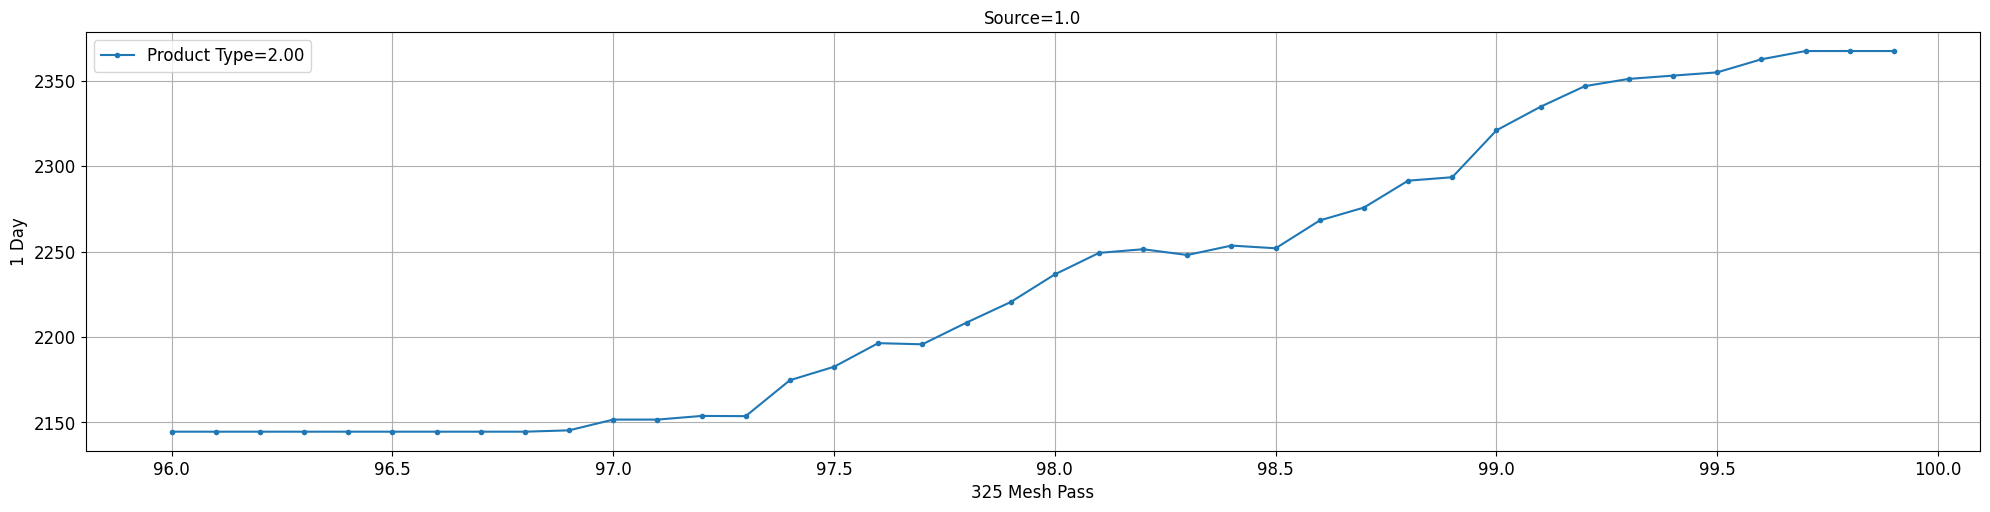

In [40]:
simulate_predictions('1 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


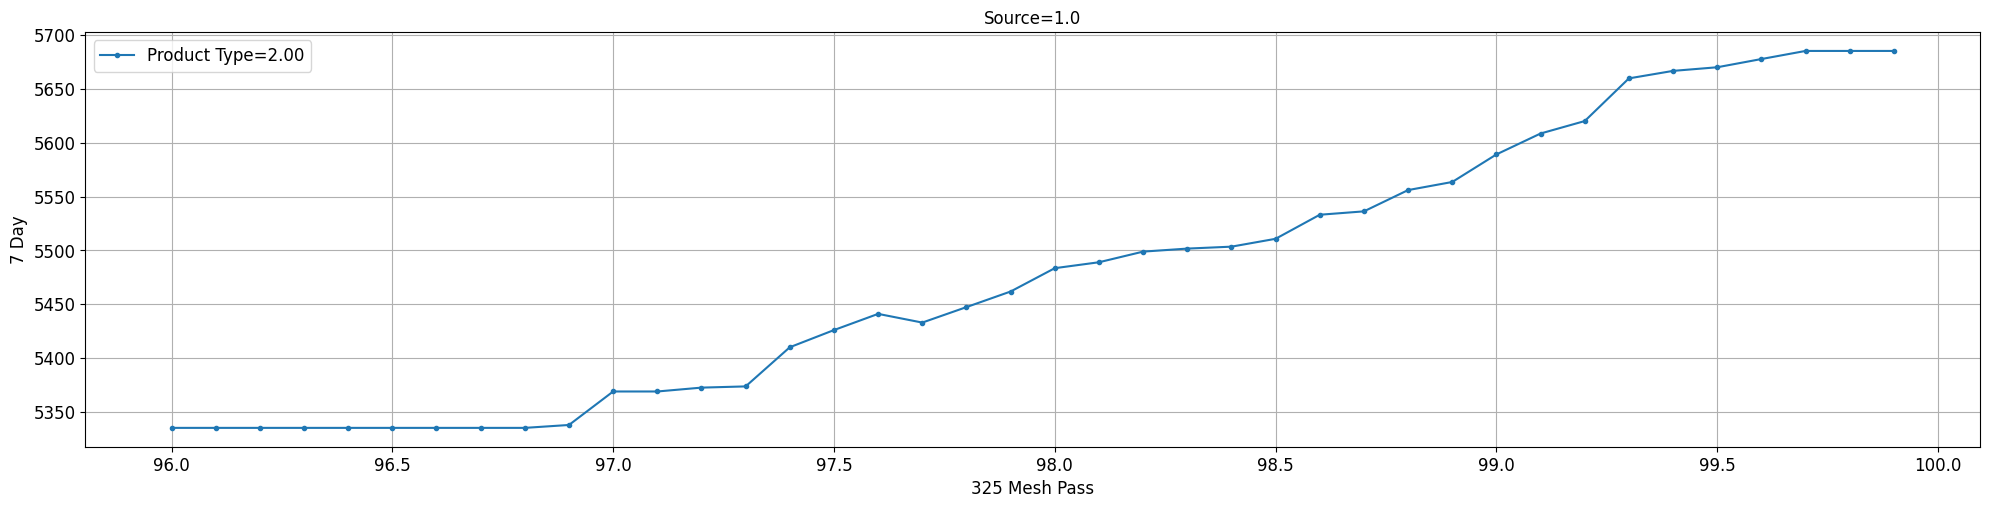

In [41]:
simulate_predictions('7 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


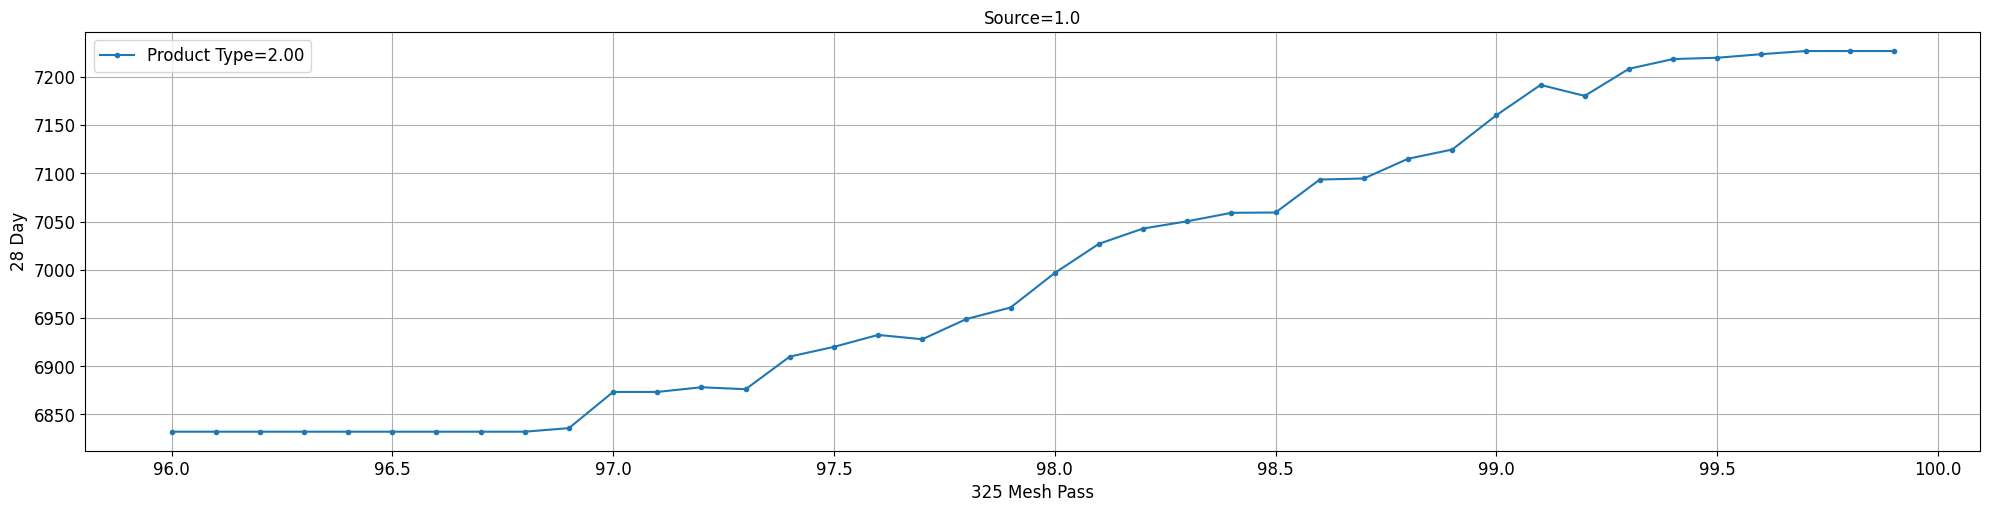

In [42]:
simulate_predictions('28 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

In [43]:
d = data[(data['Source']==1) & (data['Product Type']==1)][features]
config_path = create_simulator_config(d, '28 Day')

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


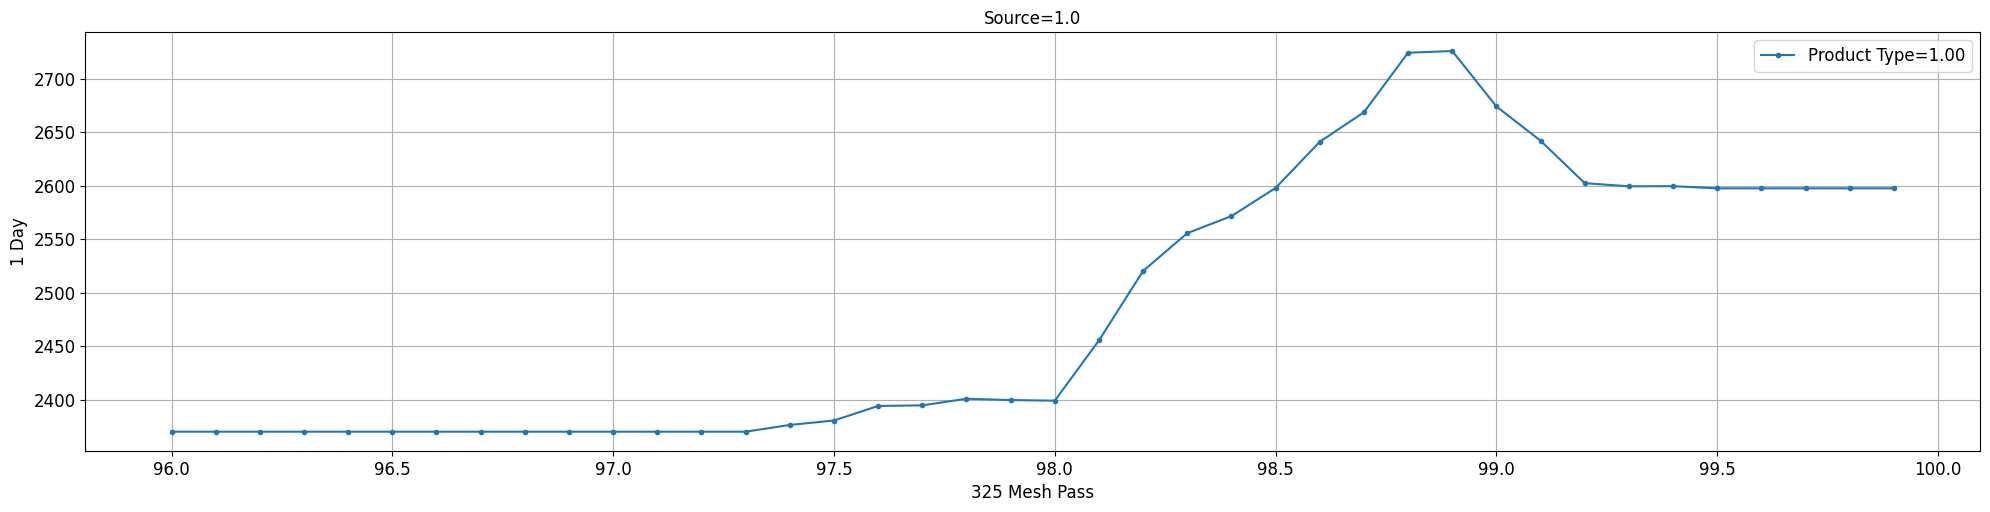

In [44]:
simulate_predictions('1 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


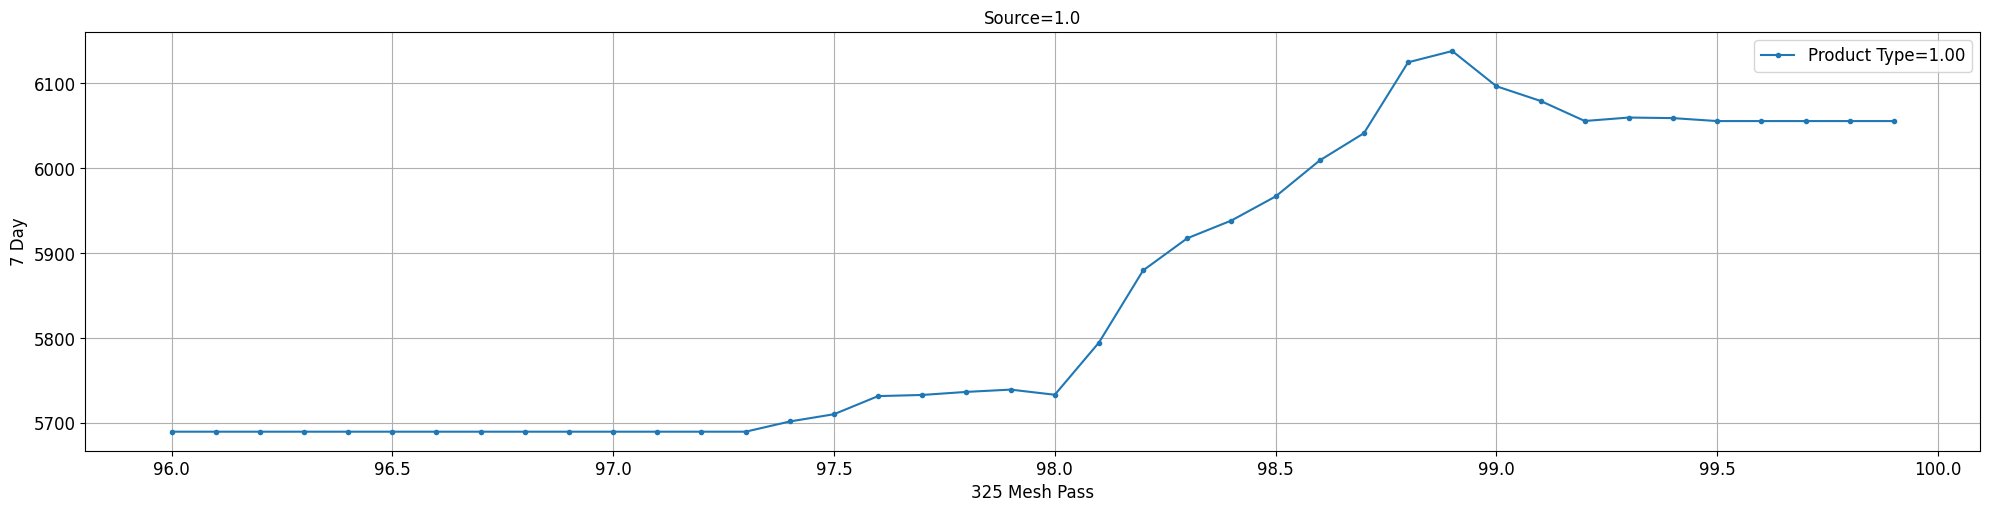

In [45]:
simulate_predictions('7 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


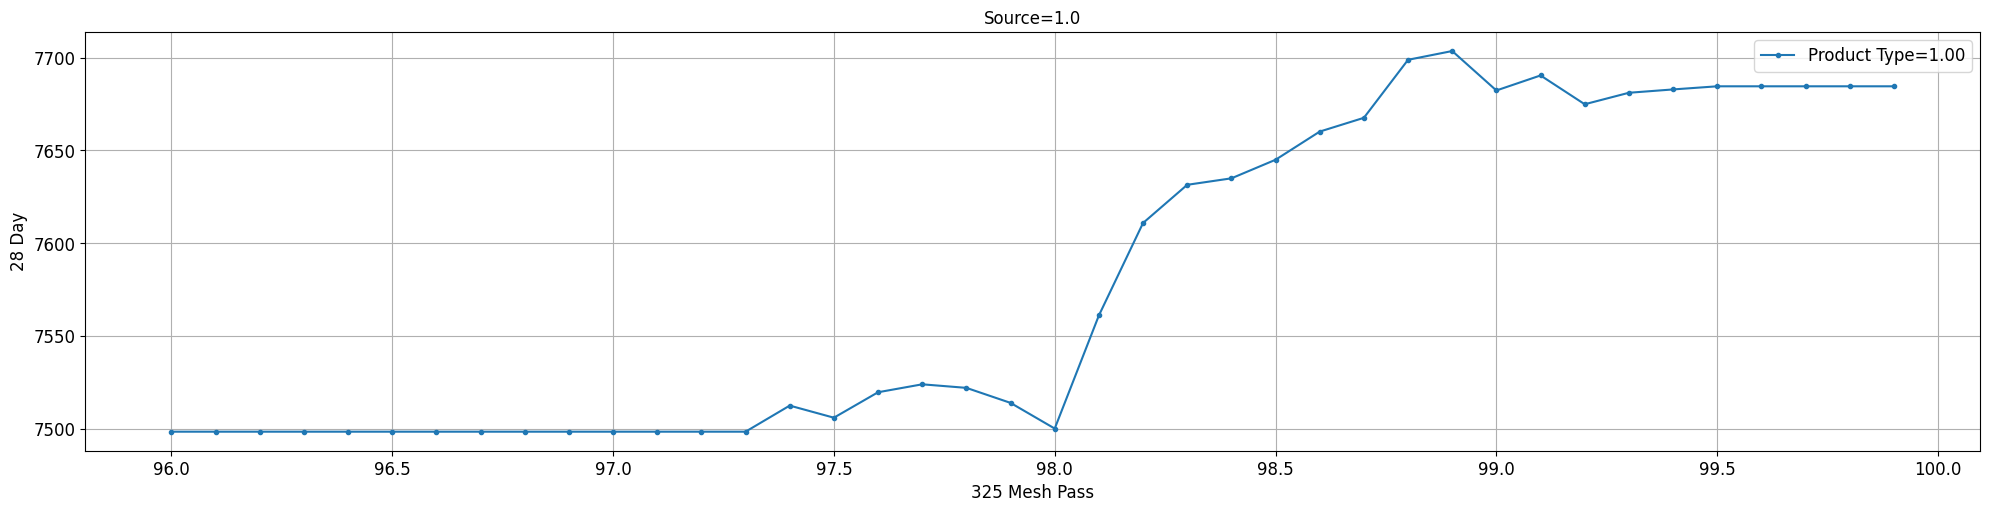

In [46]:
simulate_predictions('28 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

In [47]:
d = data[(data['Source']==2) & (data['Product Type']==2)][features]
config_path = create_simulator_config(d, '28 Day')

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


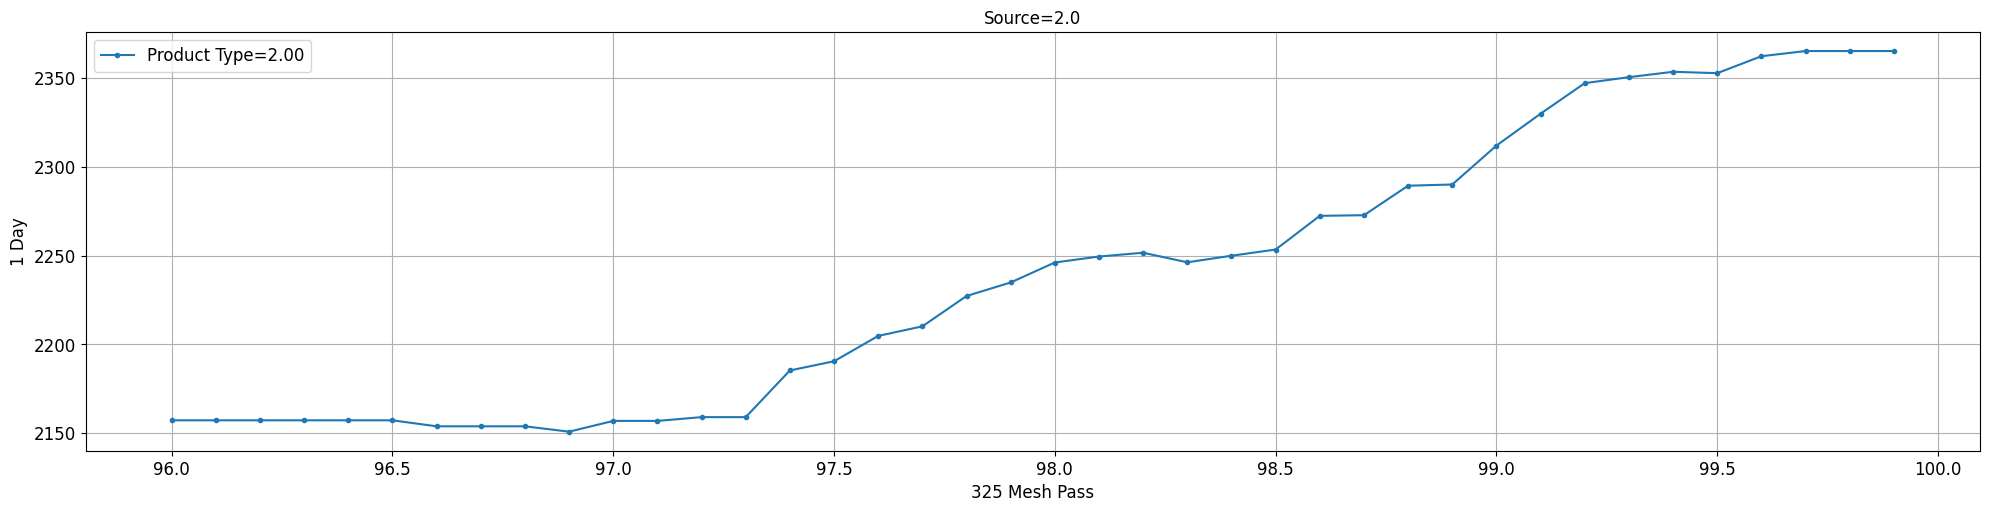

In [48]:
simulate_predictions('1 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


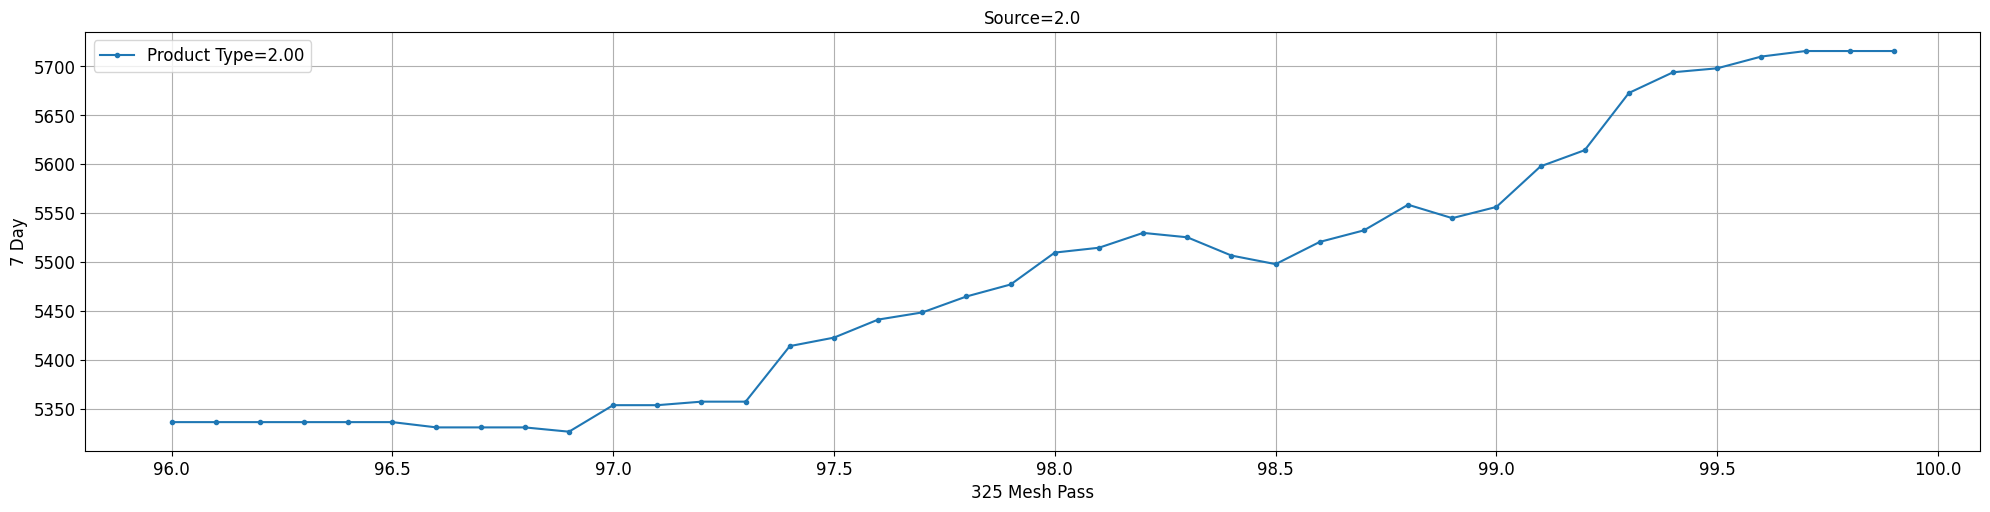

In [49]:
simulate_predictions('7 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


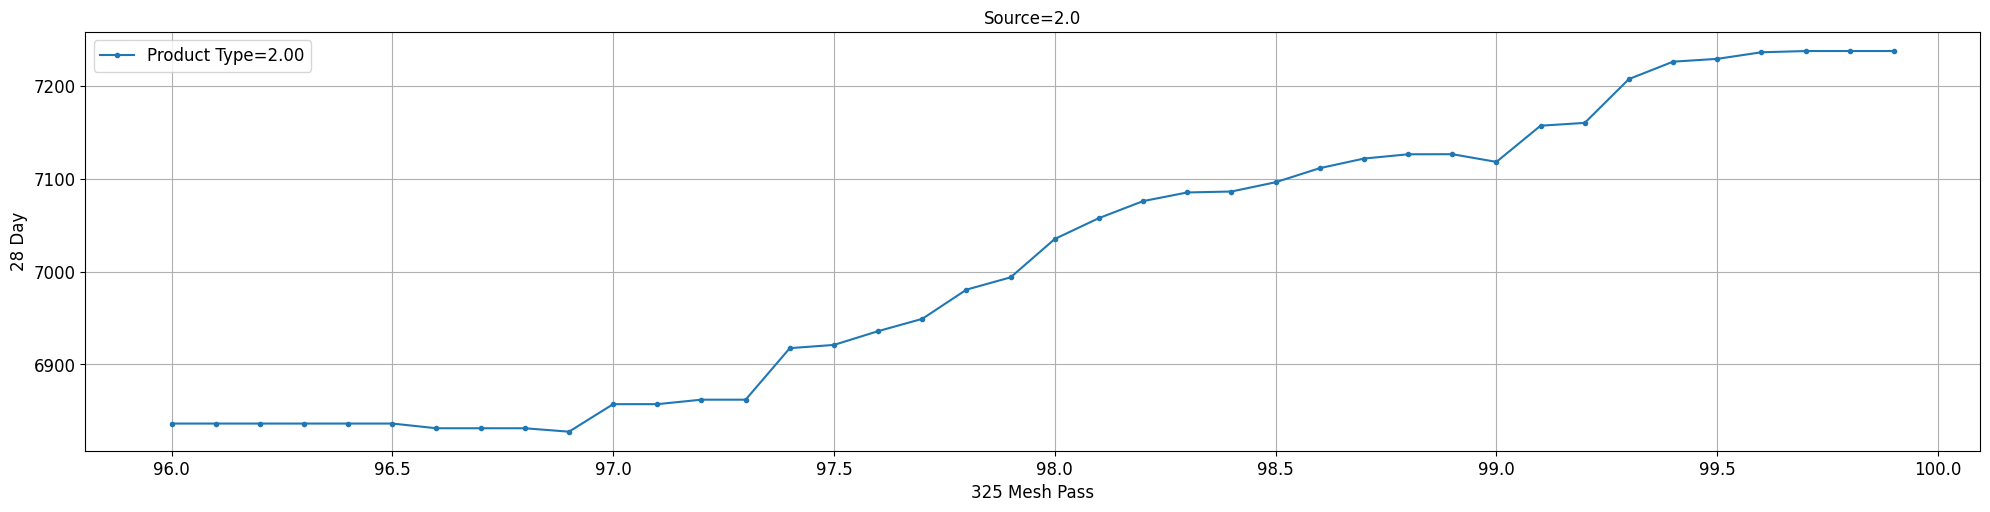

In [50]:
simulate_predictions('28 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

In [54]:
d = data[(data['Source']==1) & (data['Product Type']==3)][features]
config_path = create_simulator_config(d, '28 Day')

In [ ]:
simulate_predictions('1 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


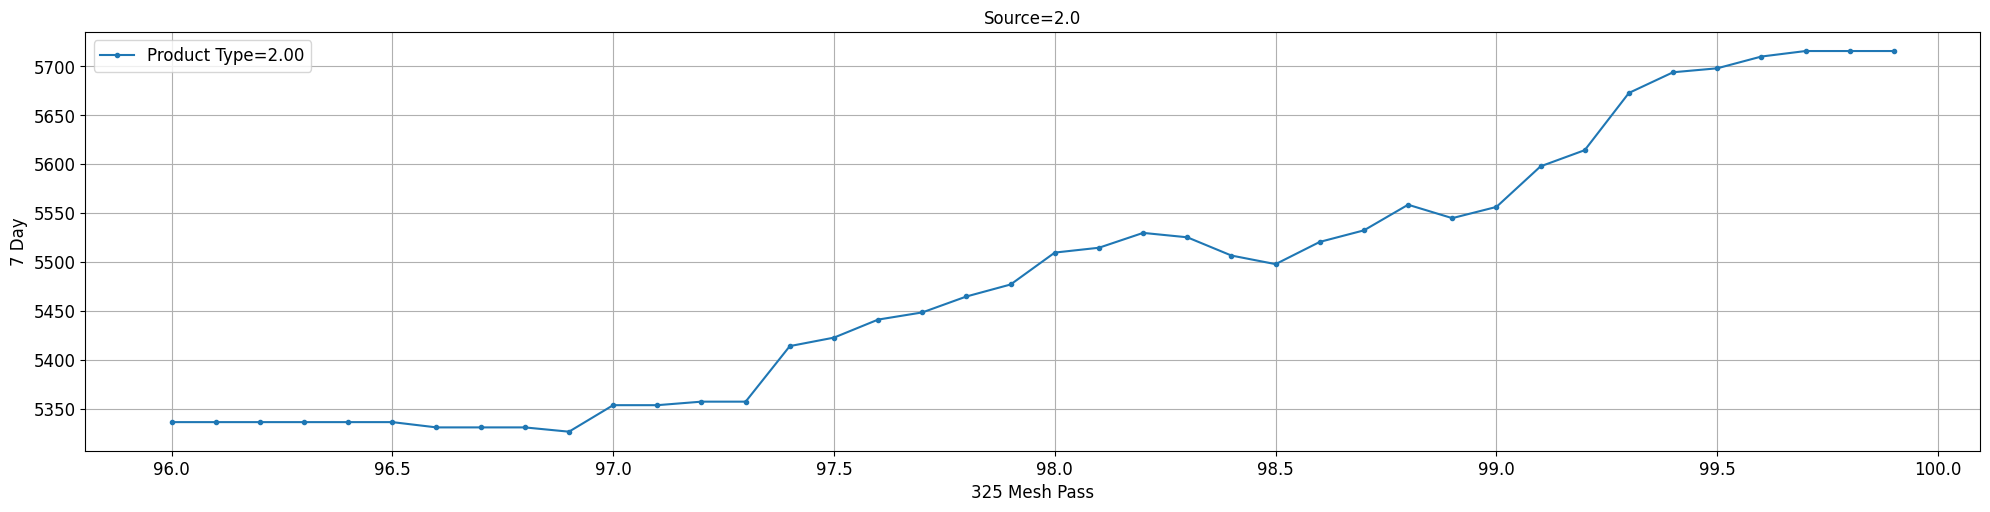

In [ ]:
simulate_predictions('7 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_17940\4015585811.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  manipulated_variables = list(df.sort_values(by='ID')[~df['ID'].isna()].index)


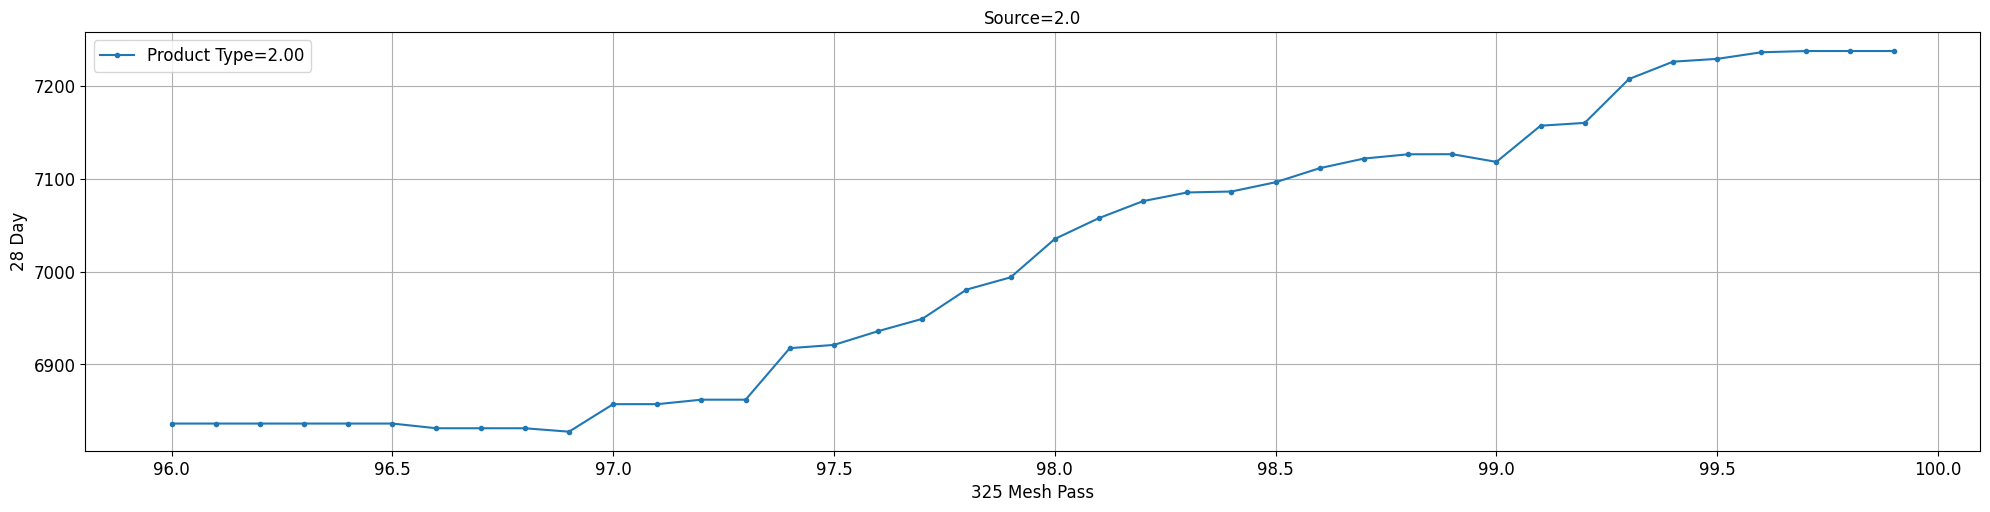

In [ ]:
simulate_predictions('28 Day', model, config_path , './', multioutput_feature_names=['1 Day', '3 Day', '7 Day', '28 Day'])

# Optimization

In [4]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from scipy.optimize import differential_evolution

# Define your model function that takes inputs and returns the predicted 28 day strength
def predict_1_day_strength(mesh_pass, inputs, model):
    inputs['325 Mesh Pass'] = mesh_pass
    inputs = inputs.values.reshape(1, -1)
    pred = model.predict(inputs)[0]
    return pred[0] # 0 for 1 Day Strength

# Define the objective function to minimize (mean squared error between predicted and target strengths)
def objective_function(mesh_pass, target_strength, fixed_inputs, model):
    predicted_strength = predict_1_day_strength(mesh_pass, fixed_inputs, model)
    return (predicted_strength - target_strength)**2
features = ['Source', 'Product Type', 'CO2', 'Belite Sum', 'Alite Sum', 'Quartz', 'Gypsum', 'MgO', '325 Mesh Pass', 'D50', 'HemiHydrate', 'CaO', 'D90', 'Fe2O3', 'SO3', 'Alite M1', 'Al2O3', 'Arcanite', 'Blaine', 'K2O', 'Na2O', 'Belite Beta', 'D10', 'Aphthitalite', 'Belite Alpha', 'Belite Gamma', 'Alum Cubic', 'Alum Ortho', 'Alum Sum', 'Alite M3', 'Ferrite', 'Calcite', 'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Fraction M1', 'SiO2']
inputs = data[features].iloc[0, :]
model = joblib.load(r"C:\Users\p.georgakis\Downloads\Alcemy_ExtraTrees_(38 inputs)_v0.cls")
target_1_day_strength = 2200
bounds = [(97, 99)]
from tqdm.notebook import tqdm_notebook
# Perform differential evolution optimization
result = differential_evolution(objective_function, 
                                bounds=bounds,
                                args=(target_1_day_strength, inputs, model))

# Extract the optimized value for "325 Mesh Pass"
optimized_325_mesh_pass = result.x[0]
optimized_325_mesh_pass = round(optimized_325_mesh_pass, 1)

print("Optimized 325 Mesh Pass value:", optimized_325_mesh_pass)

predicted_1_day_strength = predict_1_day_strength(mesh_pass=optimized_325_mesh_pass, inputs=inputs, model=model)
predicted_1_day_strength = round(predicted_1_day_strength, 1)
print("Predicted 1 Day Strength for Optimized 325 Mesh Pass:", predicted_1_day_strength, 'psi')
def optimize(data, target_1_day_strength, bounds, model):
    optimized_values = []
    for _, inputs in tqdm_notebook(data.iterrows(), total=len(data)):
        result = differential_evolution(objective_function, 
                                        bounds=bounds,
                                        args=(target_1_day_strength, inputs, model))
        optimized_325_mesh_pass = result.x[0]
        optimized_325_mesh_pass = round(optimized_325_mesh_pass, 1)
        optimized_values.append(optimized_325_mesh_pass)
    return optimized_values
optimized_values = optimize(data=data[features][:5],
                            bounds=bounds, 
                            target_1_day_strength=target_1_day_strength, 
                            model=model)

NameError: name 'data' is not defined

In [5]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from scipy.optimize import differential_evolution

In [6]:
# Define your model function that takes inputs and returns the predicted 28 day strength
def predict_1_day_strength(mesh_pass, inputs, model):
    inputs['325 Mesh Pass'] = mesh_pass
    inputs = inputs.values.reshape(1, -1)
    pred = model.predict(inputs)[0]
    return pred[0] # 0 for 1 Day Strength

# Define the objective function to minimize (mean squared error between predicted and target strengths)
def objective_function(mesh_pass, target_strength, fixed_inputs, model):
    predicted_strength = predict_1_day_strength(mesh_pass, fixed_inputs, model)
    return (predicted_strength - target_strength)**2

In [7]:
features = ['Source', 'Product Type', 'CO2', 'Belite Sum', 'Alite Sum', 'Quartz', 'Gypsum', 'MgO', '325 Mesh Pass', 'D50', 'HemiHydrate', 'CaO', 'D90', 'Fe2O3', 'SO3', 'Alite M1', 'Al2O3', 'Arcanite', 'Blaine', 'K2O', 'Na2O', 'Belite Beta', 'D10', 'Aphthitalite', 'Belite Alpha', 'Belite Gamma', 'Alum Cubic', 'Alum Ortho', 'Alum Sum', 'Alite M3', 'Ferrite', 'Calcite', 'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Fraction M1', 'SiO2']
inputs = data[features].iloc[0, :]

NameError: name 'data' is not defined

In [7]:
model = joblib.load(r"C:\Users\p.georgakis\Downloads\Alcemy_ExtraTrees_(38 inputs)_v0.cls")

In [8]:
target_1_day_strength = 2200
bounds = [(97, 99)]

In [9]:
from tqdm.notebook import tqdm_notebook

In [ ]:
# Perform differential evolution optimization
result = differential_evolution(objective_function, 
                                bounds=bounds,
                                args=(target_1_day_strength, inputs, model))

# Extract the optimized value for "325 Mesh Pass"
optimized_325_mesh_pass = result.x[0]
optimized_325_mesh_pass = round(optimized_325_mesh_pass, 1)

print("Optimized 325 Mesh Pass value:", optimized_325_mesh_pass)

predicted_1_day_strength = predict_1_day_strength(mesh_pass=optimized_325_mesh_pass, inputs=inputs, model=model)
predicted_1_day_strength = round(predicted_1_day_strength, 1)
print("Predicted 1 Day Strength for Optimized 325 Mesh Pass:", predicted_1_day_strength, 'psi')

In [11]:
def optimize(data, target_1_day_strength, bounds, model):
    optimized_values = []
    for _, inputs in tqdm_notebook(data.iterrows(), total=len(data)):
        result = differential_evolution(objective_function, 
                                        bounds=bounds,
                                        args=(target_1_day_strength, inputs, model))
        optimized_325_mesh_pass = result.x[0]
        optimized_325_mesh_pass = round(optimized_325_mesh_pass, 1)
        optimized_values.append(optimized_325_mesh_pass)
    return optimized_values

In [ ]:
optimized_values = optimize(data=data[features][:5],
                            bounds=bounds, 
                            target_1_day_strength=target_1_day_strength, 
                            model=model)

In [8]:
may_data = pd.read_excel(r"C:\Users\p.georgakis\Downloads\Alcemy-May 23-Forecast-logbook.xlsx")

In [19]:
may_data.to_excel(r"C:\Users\p.georgakis\OneDrive - Titan Cement Company SA\Documents\Projects\QSP\.idea\asset/data.xlsx")

In [15]:
variable_list.to_csv("variables.csv")

In [12]:
variable_list = pd.concat([pd.Series(may_data.columns), pd.Series(renamed_columns)], axis=1)

In [9]:
renamed_columns = ['Datetime', 'Sample name', 'Product Type', 'Created at',
       'Plant', 'Source', 'Notes', '1 Day',
       '1 Day Pred.', '3 Day', '7 Day',
       '7 Day Pred.', '28 Day', '28 Day Pred.',
       '325 Mesh Pass', '325 Mesh Pass Target RAW', '325 Mesh Pass Target',
       '325 Mesh Pass Target unbounded', 'Blaine', 'Air Cont.', 'CO2 Loss',
       'LOI @ 950Β°C', 'LOI @ 550Β°C', 'Limestone (Ignition Loss Computed)',
       'FCaO (Wet)', 'Final Set Time', 'Initial Set Time', 'FSP',
       'Strength Cube Flow', 'Al2O3', 'CaO', 'Fe2O3', 'K2O', 'MgO', 'Na2O',
       'SiO2', 'SO3', 'C2S (XRF Computed)', 'C3A (XRF Computed)',
       'C3S (XRF Computed)', 'C4AF (XRF Computed)', 'Albite', 'Andesine',
       'Anhydrite', 'Anorthite', 'Aphthitalite', 'Arcanite', 'HemiHydrate',
       'Belite Alpha', 'Belite AlphaH', 'Belite Beta', 'Belite Gamma',
       'Belite Sum', 'Alum Cubic', 'Alum Mono', 'Alum Ortho', 'Alum Sum',
       'Alite M1', 'Alite M3', 'Fraction M1', 'Alite Sum', 'Ferrite',
       'Calcite', 'Dolomite', 'Feldspar Sum', 'Gypsum', 'Illite', 'K-Feldspar',
       'Langbeinite', 'Lime', 'Periclase', 'Portlandite', 'Quartz',
       'Syngenite', 'Thenardite', 'CO2', 'FCaO (XRD)', 'SO3 (XRD Computed)',
       'D10', 'D50', 'D90', 'Passing 1 Βµm', 'Passing 5 Βµm', 'Passing 10 Βµm',
       'Passing 12 Βµm', 'Passing 20 Βµm', 'Passing 25 Βµm', 'Passing 32 Βµm',
       'Passing 37 Βµm', 'Passing 44 Βµm', 'Passing 50 Βµm', 'Passing 53 Βµm',
       'Passing 63 Βµm', 'Passing 74 Βµm', 'Passing 88 Βµm', 'Passing 100 Βµm',
       'Passing 170 Βµm', 'Passing 200 Βµm', 'Passing 325 Βµm',
       'Passing 400 Βµm']

In [10]:
may_data.columns = renamed_columns
may_data.index = pd.to_datetime(may_data['Datetime'])

In [11]:
df = may_data.copy()

In [18]:
mapping = {
    'Source': {'FM3': 0, 'FM4': 1, 'FM6': 2},
    'Product Type': {'GU': 0, 
                     'I/II': 1, 
                     'CEM IL': 2, 
                     'Masonry': 3, 
                     'Stucco': 4}
}

df['Source'] = df['Source'].replace(mapping['Source'])
df['Product Type'] = df['Product Type'].replace(mapping['Product Type'])

df = df.fillna(0)

In [ ]:
# inputs = df[features]
inputs = df.copy()
inputs

In [40]:
source = 1
product_type = 2

In [62]:
indices_to_drop = inputs.index[inputs['325 Mesh Pass Target']==0]

In [63]:
inputs = inputs[(inputs['Source']==source) & 
                (inputs['Product Type']==product_type) &
                (inputs['325 Mesh Pass Target'] !=0)]

# inputs = inputs[(inputs['Source']==source) & 
#                 (inputs['Product Type']==product_type)]

In [64]:
target_1_day_strength = 2200
bounds = [(97, 99)]

In [24]:
optimized_values = optimize(data=inputs[features],
                            bounds=bounds, 
                            target_1_day_strength=target_1_day_strength, 
                            model=model)

  0%|          | 0/364 [00:00<?, ?it/s]

In [65]:
inputs['325 Mesh Pass Optimized'] = optimized_values

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_16076\1326361870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['325 Mesh Pass Optimized'] = optimized_values


In [66]:
predicted_values = []
for i, mesh_pass in enumerate(optimized_values):
    prediction = predict_1_day_strength(mesh_pass=mesh_pass, inputs=inputs[features].iloc[i], model=model)
    prediction = round(prediction, 1)
    predicted_values.append(prediction)

In [103]:
inputs['1 Day Predicted'] = predicted_values

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_16076\3030688514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['1 Day Predicted'] = predicted_values


In [69]:
inputs['325 Mesh Pass Target'] = inputs['325 Mesh Pass Target']/1000

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_16076\3982517457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['325 Mesh Pass Target'] = inputs['325 Mesh Pass Target']/1000


In [84]:
inputs['325 Mesh Pass Target'].loc[inputs['325 Mesh Pass Target']<1] = np.nan
inputs['325 Mesh Pass'] = inputs['325 Mesh Pass'].replace(0, np.nan)

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_16076\667506147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['325 Mesh Pass Target'].loc[inputs['325 Mesh Pass Target']<1] = np.nan
C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_16076\667506147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['325 Mesh Pass'] = inputs['325 Mesh Pass'].replace(0, np.nan)


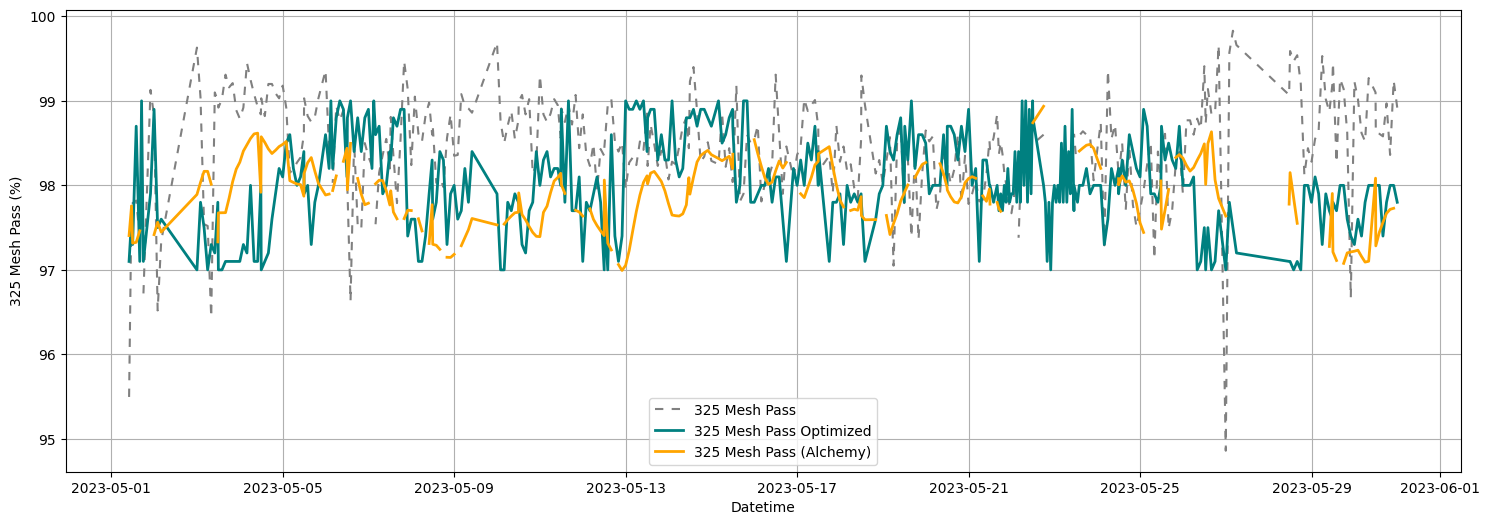

In [175]:
plt.figure(figsize=(18, 6))
real_line, = plt.plot(inputs.index, inputs['325 Mesh Pass'], label='325 Mesh Pass', c='gray', linestyle='--')
real_line.set_dashes([4, 4])
plt.plot(inputs.index, inputs['325 Mesh Pass Optimized'], label='325 Mesh Pass Optimized', c='teal', linewidth=2)
plt.plot(inputs.index, inputs['325 Mesh Pass Target'], label='325 Mesh Pass (Alchemy)', c='orange', linewidth=2)
plt.xlabel('Datetime')
plt.ylabel('325 Mesh Pass (%)')
plt.grid()
plt.legend()
plt.show()

In [142]:
inputs['1 Day Target'] = target_1_day_strength

C:\Users\p.georgakis\AppData\Local\Temp\ipykernel_16076\1846210679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['1 Day Target'] = target_1_day_strength


In [ ]:
inputs['1 Day'] = inputs['1 Day']*1000
inputs['1 Day Pred.'] = inputs['1 Day Pred.'].str.replace(',','')
inputs['1 Day'].loc[inputs['1 Day']<1] = np.nan
inputs['1 Day Pred.'] = inputs['1 Day Pred.'].astype(float)

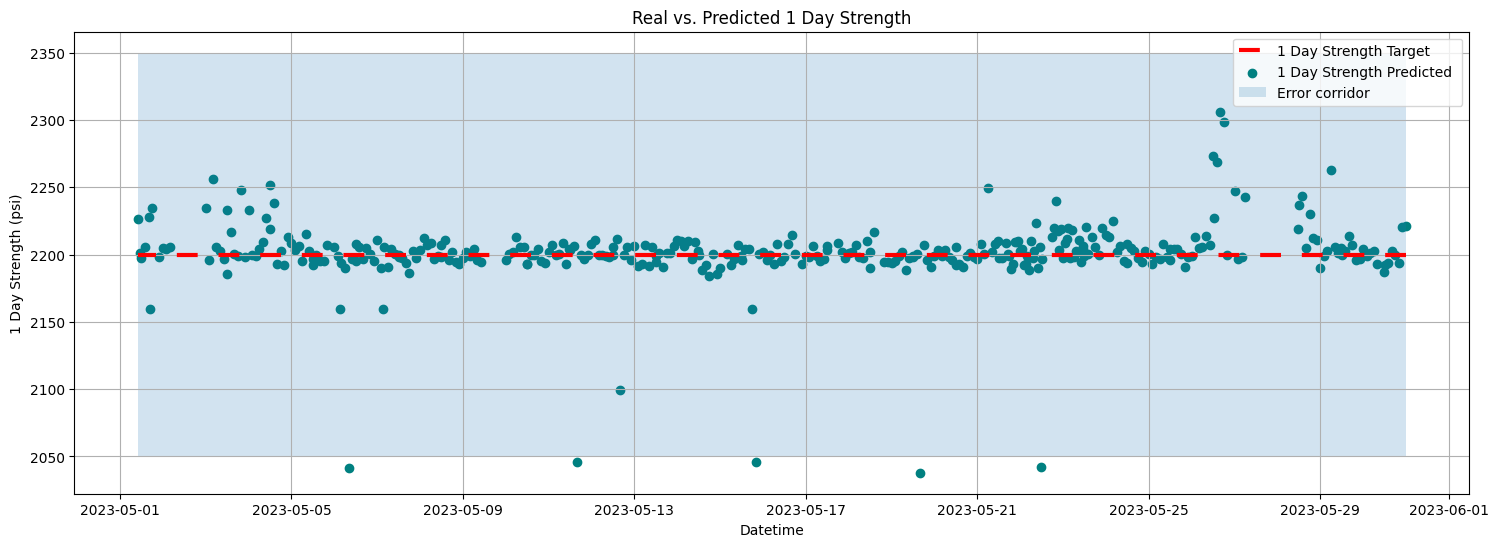

In [174]:

# Create the second time series plot
plt.figure(figsize=(18, 6))
# plt.plot(inputs.index, inputs['1 Day'], marker='o', c='blue', label='1 Day Strength Real')
plt.plot(inputs.index, inputs['1 Day Target'],  c='red', label='1 Day Strength Target', linewidth=3, linestyle='--', dashes=[5])
plt.scatter(inputs.index, inputs['1 Day Predicted'], marker='o', c='teal', label='1 Day Strength Predicted ')
# plt.scatter(inputs.index, inputs['1 Day Pred.'], marker='x', c='green', label='1 Day Strength Predicted (Alchemy)')
plt.fill_between(inputs.index, inputs['1 Day Target']-150, inputs['1 Day Target']+150, alpha=0.2, label='Error corridor')
plt.xlabel('Datetime')
plt.ylabel('1 Day Strength (psi)')
plt.legend()
plt.grid()
plt.show()

# MISC

In [5]:
import requests
import io
import pandas as pd

In [4]:
response = requests.get("http://10.7.158.133:12600/download")
response

<Response [200]>

In [8]:
csv_data = io.StringIO(response.text)
df = pd.read_csv(csv_data, sep=';')

In [9]:
df

,Timestamp,N3_LIMS_MT3_BLAINE_OUT,N3CMO_BLAINE_TARGET,N3F03_A1_A.A1,N3FEEDER1_ACTUAL,N3W03_CID_A.VAL,N3F04_A1_A.A1,N3FEEDER3_ACTUAL,N3W04_CID_A.VAL,N3D01_A1_A.A1,...,PID_N3CONT09.CVLLimit,PID_N3CONT09.CVHAlarm,PID_N3CONT09.CVLAlarm,N3I02_A1_A.A1,PID_N3CONT09.SPProg,N3I01_A1_A.A1,N3S04_A1_A.A1,N3S01_SOL_A.VAL,N3TOTAL_FEED,N3F02_A1_A.A1
0,2023-07-17 10:46:00,5170.0,5100.0,71.58854,78.28934,82.5,3.559028,3.892159,0.0,0.066704,...,30.0,0.0,0.0,551.7940,550.0,242.0286,1199.978,1186.5,318.8715,300.2083
1,2023-07-17 10:46:30,5170.0,5100.0,71.41927,78.44679,82.5,3.501157,3.845665,0.0,0.066704,...,30.0,0.0,0.0,552.9514,550.0,262.8828,1200.846,1186.5,321.6551,346.5054
2,2023-07-17 10:47:00,5170.0,5100.0,71.41927,78.44679,82.5,3.501157,3.845665,0.0,0.066704,...,30.0,0.0,0.0,551.7940,550.0,259.4739,1200.792,1186.5,321.5104,852.8801
3,2023-07-17 10:47:30,5170.0,5100.0,71.58854,78.28934,82.5,3.515625,3.844693,0.0,0.066704,...,30.0,0.0,0.0,550.6366,550.0,253.2578,1200.412,1186.5,324.0799,847.0930
4,2023-07-17 10:48:00,5170.0,5100.0,71.40625,78.43250,82.5,3.573495,3.925121,0.0,0.066704,...,30.0,0.0,0.0,552.0833,550.0,242.8307,1199.165,1186.0,324.9826,838.4124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2023-07-20 10:41:00,5430.0,5100.0,75.54688,82.43819,78.7,0.000000,0.000000,0.0,0.102333,...,30.0,0.0,0.0,551.7940,550.0,253.6588,1193.305,1180.0,317.6244,1003.3460
8636,2023-07-20 10:41:30,5430.0,5100.0,75.71614,82.26445,78.7,0.000000,0.000000,0.0,0.102333,...,30.0,0.0,0.0,549.7685,550.0,243.2318,1192.220,1180.0,319.3258,878.9224
8637,2023-07-20 10:42:00,5430.0,5100.0,75.71614,82.26445,78.7,0.000000,0.000000,0.0,0.102333,...,30.0,0.0,0.0,550.6366,550.0,242.8307,1193.359,1180.0,320.9172,835.5188
8638,2023-07-20 10:42:30,5430.0,5100.0,75.88541,82.44836,78.7,0.000000,0.000000,0.0,0.102333,...,30.0,0.0,0.0,549.4792,550.0,231.2005,1193.902,1180.0,320.9172,890.4966


## ANT

In [3]:
data_path = r"C:\Users\p.georgakis\Downloads\ANT_KILN_Historical_data_17_2022-07-2023.parquet"
df = pd.read_parquet(data_path)

In [4]:
glossary_path = r"C:\Users\p.georgakis\Downloads\101-ANT-KLN-L-001_v0.2 yellow 04 07 23.xlsx"
glossary = pd.read_excel(glossary_path)

c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [5]:
rename_dict = dict(zip(glossary['Tag ID'], glossary['Tag description']))

# Use the rename() function to rename the columns in the original DataFrame
# df = df.rename(columns=rename_dict)

In [6]:
from collections import Counter

def find_duplicates(input_list):
    counts = Counter(input_list)
    return [item for item, count in counts.items() if count > 1]

duplicate_cols = find_duplicates(list(df.columns))
duplicate_cols

[]

In [7]:
def rename_duplicates(rename_dict):
    seen = {}
    new_rename_dict = {}

    for old_name, new_name in rename_dict.items():
        if new_name in seen:
            seen[new_name] += 1
            new_new_name = f"{new_name}_{seen[new_name]}"
        else:
            seen[new_name] = 1
            new_new_name = new_name

        new_rename_dict[old_name] = new_new_name

    return new_rename_dict

new_rename_dict = rename_duplicates(rename_dict)
new_rename_dict

{'Unique identifier ': 'Description of tag. Include statement for calculated variables.',
 '0HSJ10/CL001.MV': 'Filling_level_urea_mixing_tank',
 '0HSJ10/CT001.MV': 'Temperature_urea_mixing_tank',
 '0HSJ11/CF001.MV': 'Actual_flow_dissolving_water_line',
 '0HSJ11/CL001.MV': 'Filling_level_dissolving_water_tank',
 '0HSJ11/CT001.MV': 'Temperature_dissolving_water_tank',
 '0HSJ11/CT002.MV': 'Temperature_dissolving_water_line',
 '0HSJ20/CL001.MV': 'Filling_level_urea_storage_tank',
 '0HSJ20/CT001.MV': 'Temperature_urea_storage__tank',
 '0HSW10/CP001.MV': 'Pressure_purge_air',
 '1HSK10/AA050.MV': 'Position_urea_regulation_valve',
 '1HSK10/CF001.MV': 'Flow_urea_modul',
 '1HSK11/CP001.MV': 'Pressure_mixture',
 '1HSL10/AA050.MV': 'Position_dilution_water_regulation_valve',
 '310PU01/YF01.MV': 'CALCINER EMULSION WATER FLOW',
 '651PU01/YF01.MV': 'emulsion water flow measurement',
 '651TN01/YL01.MV': 'emulsion water tank level measurement',
 '1HSL10/CF001.MV': 'Flow_dilution_water_modul',
 '1QEB10/

In [8]:
df = df.rename(columns=new_rename_dict)

In [9]:
df = df.sort_index(axis=1)

In [10]:
df

,Bag filter inlet temperature,Bag filter inlet temperature SP,Bucket Elevator Motor Power Measure_2,CALCINER UPPER LINE DAMPER POSITION FEEDBACK,CLINKER TEMP. MONITOR,Calciner Bottom Temperature,Calciner Bottom Temperature/Pyrometer,Calciner Outlet Temperature controller,Calciner Outlet Temperature controller SP,Calciner Pressure,...,Transport Capacity,Unnamed: 0,Valve Position Measure,Valve Position Measure_2,Water Injection Inlet Temperature,Water Injection Liquid Flow,Water Injection Outlet Temperature,Water injection flow,Water injection pump speed,Weigh Feeder For Kiln Burner Panel Actual Feed Rate
0,30.55746,200.0,0.0000,41.83914,27.19833,299.9998,NaN,27.50054,855.0,-0.087347,...,0.00,0,40.56603,36.42841,29.51309,0.0000,25.86735,220.0,2900.000,0.000000
1,30.55858,200.0,0.0000,41.83914,27.19833,299.9998,NaN,27.59829,855.0,-0.087347,...,0.00,1,40.56603,36.42841,29.51309,0.0000,25.86735,220.0,2900.000,0.000000
2,30.54497,200.0,0.0000,41.83914,27.19833,299.9998,NaN,27.45757,855.0,-0.093134,...,0.00,2,40.56603,36.42841,29.51309,0.0000,25.86735,220.0,2900.000,0.000000
3,30.54107,200.0,0.0000,41.83914,27.19833,299.9998,NaN,27.64012,855.0,-0.081560,...,0.00,3,40.56603,36.42841,29.51309,0.0000,25.86735,220.0,2900.000,0.000000
4,30.52798,200.0,0.0000,41.83914,27.19833,299.9998,NaN,27.62854,855.0,-0.087347,...,0.00,4,40.56603,36.42841,29.51309,0.0000,25.86735,220.0,2900.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972995,206.29250,210.0,109.6908,100.00000,84.19910,299.9998,818.4006,859.48820,855.0,-12.644880,...,40.82,972995,42.09955,37.29644,311.91020,220.4573,214.73840,220.0,2446.773,8.610420
972996,206.11130,210.0,109.5597,100.00000,59.89420,299.9998,818.9070,859.52980,855.0,-13.229350,...,40.65,972996,42.09955,37.29644,311.72610,219.8936,213.80920,220.0,2446.773,8.591281
972997,205.90300,210.0,109.5753,100.00000,73.78271,299.9998,820.3074,859.50380,855.0,-13.107830,...,39.78,972997,42.09955,37.29644,311.58110,219.9179,212.94570,220.0,2446.773,8.586948
972998,205.69030,210.0,109.4520,100.00000,66.25977,299.9998,817.2144,859.56340,855.0,-13.073100,...,39.67,972998,42.09955,37.29644,311.45040,220.3577,212.29140,220.0,2446.771,8.599864


In [12]:
filter_1 = df['Flow Meter Actual Feed Rate'] > 80
filter_2 = df['Kiln Main Drive Speed Measure'] > 1.5

dff = df[filter_1 & filter_2]

In [68]:
pd.DataFrame(dff.columns).to_csv('eda_index.csv', sep=';')

In [14]:
my_report = sv.analyze(dff, pairwise_analysis='off')
my_report.show_html('eda_ant_kiln_nwc.html', layout='widescreen')

Feature: Root Blower Motor Current Measure_2 |████████▋ | [ 87%]   09:55 -> (01:56 left)c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
Feature: Root Blower Motor Current Measure_3 |████████▋ | [ 87%]   09:56 -> (01:32 left)c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: Root Blower Motor Current Measurement|████████▋ | [ 87%]   09:58 -> (01:34 left)c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, y

Report eda_ant_kiln_nwc.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## USJ K3

In [15]:
data_path = r"C:\Users\p.georgakis\Downloads\USJ_KILN3_Historical_data_17_2022-07-2023.parquet"
df = pd.read_parquet(data_path)

In [16]:
glossary_path = r"C:\Users\p.georgakis\Downloads\101-USJ-KLN3-L-001_v0.2 yellow 05 07 23.xlsb"
glossary = pd.read_excel(glossary_path)

In [ ]:
glossary

In [17]:
rename_dict = dict(zip(glossary['Tag ID'], glossary['Tag description']))

# Use the rename() function to rename the columns in the original DataFrame
# df = df.rename(columns=rename_dict)

In [18]:
from collections import Counter

def find_duplicates(input_list):
    counts = Counter(input_list)
    return [item for item, count in counts.items() if count > 1]

duplicate_cols = find_duplicates(list(df.columns))
duplicate_cols

[]

In [20]:
def rename_duplicates(rename_dict):
    seen = {}
    new_rename_dict = {}

    for old_name, new_name in rename_dict.items():
        if new_name in seen:
            seen[new_name] += 1
            new_new_name = f"{new_name}_{seen[new_name]}"
        else:
            seen[new_name] = 1
            new_new_name = new_name

        new_rename_dict[old_name] = new_new_name

    return new_rename_dict

new_rename_dict = rename_duplicates(rename_dict)
new_rename_dict

{'Unique identifier ': 'Description of tag. Include statement for calculated variables.',
 'AI_I_K2_35_02/Z1.PV_Out#Value': 'Struja na primaren ventilator za dizna',
 'T1_K2_35_02/Z1.PV_Out#Value': 'Temperatura 1 na lageri na ventilator na dizna',
 'T2_K2_35_02/Z1.PV_Out#Value': 'Temperatura 2 na lageri na ventilator na dizna',
 'PID_DRIVE_D8_1/PID.PV_IN': 'Temperature at preheater outlet - PID',
 'PID_DRIVE_D8_1/PID.LMN': 'REGULATION SPEED ROTARY FEEDER RAW MEAL',
 'PID_DRIVE_D8_1/PID.SP': 'Temperature at preheater outlet - PID_2',
 'AI_I_M2_26_11/Z1.PV_Out#Value': 'Struja na M2_26_11',
 'AI_I_d7/Z1.PV_Out#Value': 'Struja na D7',
 'AI_I_d8_1/Z1.PV_Out#Value': 'Struja na D8_1',
 'AI_N_d8_1/Z1.PV_Out#Value': 'Brzina na D8_1',
 'AI_I_K2_25_03/Z1.PV_Out#Value': 'Struja na K2_25_03',
 'K3_SB_Pos_Reg_Dumper/Z1.PV_Out#Value': 'Position of regulating dumper SB K3',
 'K3_SB_Actual_Feedrate/Z1.PV_Out#Value': 'Actual feedrate SB K3',
 'K3_SB_Bin_Weight/Z1.PV_Out#Value': 'Bin weight SB K3',
 'K3_

In [21]:
df = df.rename(columns=new_rename_dict)

In [22]:
df = df.sort_index(axis=1)

In [24]:
filter_1 = df['Actual feedrate SB K3'] > 75
filter_2 = df['Brzina na pecka'] > 1.25

dff = df[filter_1 & filter_2]

In [ ]:
pd.DataFrame(df.columns).to_csv('eda_index.csv', sep=';')

In [27]:
my_report = sv.analyze(dff, pairwise_analysis='off')
my_report.show_html('eda_usj_k3_nwc.html', layout='widescreen')

c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()
Feature: AF feedrate                         |          | [  0%]   00:32 -> (2:05:21 left)c:\ProgramData\miniconda3\envs\rto_env\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
Feature: Actual feedrate SB K3               |          | [  1%] 

Report eda_usj_k3_nwc.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
